<a href="https://colab.research.google.com/github/bidin485/ABOUT-ZAHARAH-BIDIN/blob/main/Maama_Digital_Wallet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MSF_MATERNAL_HEALTH ML MODELS**


### Connect to Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Importing the Dependencies**

In [ ]:
import pandas as pd
import os
import numpy as np


# For Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter
from numpy import where
from sklearn.compose import ColumnTransformer
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

# For Feature Selection and Modeling
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from lightgbm.sklearn import LGBMClassifier
from xgboost.sklearn import XGBClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OrdinalEncoder
#from catboost import CatBoostClassifier, Pool

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, PredefinedSplit, StratifiedShuffleSplit


# For Model Evalution
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, auc, roc_auc_score, roc_curve, auc, balanced_accuracy_score





## **Exploratory Data Analysis (EDA)**

In [ ]:
# loading the msf_maternal health dataset to a pandas DataFrame

df = pd.read_csv("/content/drive/MyDrive/msf_maternal_health_combined_features_datasett.csv")

In [ ]:
#Checking the number of observations (450 rows) and features (55 columns)

df.shape

(450, 55)

In [ ]:
#Display the top 8 observations

df.head(8)

Mother_UID  Yrs_Of_Marriage  Sibling  No_of_sibling  Education  Hobbies_a  \
0           1                5        1            1.0          5        2.0   
1           2                2        0            0.0          4        2.0   
2           3                4        1            1.0          4        2.0   
3           4                3        1            1.0          4        2.0   
4           5                2        0            0.0          3        3.0   
5           6                8        1            2.0          3        2.0   
6           7                2        0            0.0          3        2.0   
7           8                2        0            0.0          4        2.0   

   Hobbies_b  Hobbies_c  Hobbies_d  Hobbies_e  ...  Travel_Mode_c  Works_As_a  \
0        3.0        2.0        1.0        1.0  ...              3           3   
1        3.0        2.0        1.0        2.0  ...              3           3   
2        2.0        2.0        2.0        2.0  ...              4           3   
3        3.0        2.0        1.0        1.0  ...              3           1   
4        3.0        3.0        1.0        1.0  ...              2           1   
5        3.0        2.0        1.0        2.0  ...              2           1   
6        3.0        3.0        1.0        2.0  ...              2           1   
7        1.0        2.0        1.0        2.0  ...              4           1   

   Works_As_b  Contraceptive_Time_a  Contraceptive_Type_a  Intercourse_a  \
0           1                     1                     6              1   
1           1                     1                     6              1   
2           1                     1                     6              1   
3           1                     1                     6              1   
4           1                     1                     6              1   
5           1                     4                     2              1   
6           1                     1                     6              1   
7           1                     1                     6              1   

   Cravings_a  Cravings_b  Cravings_c  Family_Income  
0         2.0         2.0         2.0              2  
1         2.0         2.0         2.0              2  
2         2.0         2.0         2.0              2  
3         2.0         2.0         2.0              2  
4         2.0         1.0         3.0              1  
5         2.0         2.0         2.0              2  
6         1.0         2.0         2.0              1  
7         2.0         3.0         2.0              2  

[8 rows x 55 columns]

In [ ]:
# Getting the statistical measures of the data

df.describe(include="all")

Mother_UID  Yrs_Of_Marriage     Sibling  No_of_sibling   Education  \
count  450.000000       450.000000  450.000000     200.000000  450.000000   
mean   225.500000         4.091111    0.495556       0.695000    3.962222   
std    130.048068         2.963499    0.513712       0.839942    1.127069   
min      1.000000         0.000000    0.000000       0.000000    0.000000   
25%    113.250000         2.000000    0.000000       0.000000    3.000000   
50%    225.500000         3.000000    0.000000       0.000000    4.000000   
75%    337.750000         5.000000    1.000000       1.000000    5.000000   
max    450.000000        24.000000    3.000000       3.000000    6.000000   

        Hobbies_a   Hobbies_b   Hobbies_c   Hobbies_d   Hobbies_e  ...  \
count  200.000000  200.000000  200.000000  200.000000  200.000000  ...   
mean     1.955000    2.035000    2.030000    1.850000    1.955000  ...   
std      0.451658    0.272297    0.222141    0.385021    0.251578  ...   
min      1.000000    1.000000    1.000000    1.000000    1.000000  ...   
25%      2.000000    2.000000    2.000000    2.000000    2.000000  ...   
50%      2.000000    2.000000    2.000000    2.000000    2.000000  ...   
75%      2.000000    2.000000    2.000000    2.000000    2.000000  ...   
max      3.000000    3.000000    3.000000    3.000000    3.000000  ...   

       Travel_Mode_c  Works_As_a  Works_As_b  Contraceptive_Time_a  \
count     450.000000  450.000000  450.000000            450.000000   
mean        2.280000    1.873333    1.642222              1.433333   
std         1.234904    1.055034    0.984736              1.084924   
min         0.000000    1.000000    1.000000              1.000000   
25%         1.000000    1.000000    1.000000              1.000000   
50%         3.000000    1.000000    1.000000              1.000000   
75%         3.000000    3.000000    2.000000              1.000000   
max         6.000000    5.000000    5.000000              6.000000   

       Contraceptive_Type_a  Intercourse_a  Cravings_a  Cravings_b  \
count            450.000000     450.000000  200.000000  200.000000   
mean               5.275556       1.400000    1.915000    1.940000   
std                1.597486       0.533927    0.445835    0.342031   
min                1.000000       1.000000    1.000000    1.000000   
25%                6.000000       1.000000    2.000000    2.000000   
50%                6.000000       1.000000    2.000000    2.000000   
75%                6.000000       2.000000    2.000000    2.000000   
max                6.000000       3.000000    3.000000    3.000000   

       Cravings_c  Family_Income  
count  200.000000     450.000000  
mean     1.960000       1.773333  
std      0.446539       0.842734  
min      1.000000       1.000000  
25%      2.000000       1.000000  
50%      2.000000       2.000000  
75%      2.000000       2.000000  
max      3.000000       4.000000  

[8 rows x 55 columns]

In [ ]:
# More details about the data types and count for each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 55 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Mother_UID             450 non-null    int64  
 1   Yrs_Of_Marriage        450 non-null    int64  
 2   Sibling                450 non-null    int64  
 3   No_of_sibling          200 non-null    float64
 4   Education              450 non-null    int64  
 5   Hobbies_a              200 non-null    float64
 6   Hobbies_b              200 non-null    float64
 7   Hobbies_c              200 non-null    float64
 8   Hobbies_d              200 non-null    float64
 9   Hobbies_e              200 non-null    float64
 10  Hobbies_f              200 non-null    float64
 11  Hobbies_g              200 non-null    float64
 12  Leave_a                200 non-null    float64
 13  Family_Support_a       200 non-null    float64
 14  Family_Support_b       200 non-null    float64
 15  Family

##### Univariate analysis

([<matplotlib.patches.Wedge at 0x79d4ce5f5c10>,
 [Text(-1.0485097396599585, 0.33260686378697335, '5'),
  Text(0.3326074679223123, -1.048509548016759, '4'),
  Text(1.05947883298911, 0.2958117686097589, '3'),
  Text(0.5028073711317127, 0.9783581897932966, '2'),
  Text(0.18344515666978353, 1.0845957193786073, '1'),
  Text(0.05373375722795147, 1.0986867994720642, '0'),
  Text(0.015357100730543066, 1.0998927945291541, '6')],
 [Text(-0.5719144034508864, 0.18142192570198543, '40.2%'),
  Text(0.18142225523035216, -0.5719142989182321, '29.3%'),
  Text(0.5778975452667873, 0.1613518737871412, '19.6%'),
  Text(0.2742585660718433, 0.5336499217054345, '6.7%'),
  Text(0.10006099454715466, 0.591597665115604, '3.1%'),
  Text(0.02930932212433716, 0.599283708802944, '0.7%'),
  Text(0.008376600398478035, 0.5999415242886295, '0.4%')])

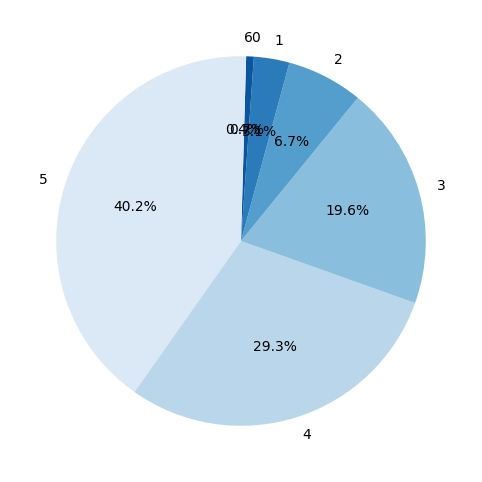

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')




education_counts = df['Education'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Blues'))

([<matplotlib.patches.Wedge at 0x79d4c5d7dd90>,
 [Text(-1.0931447292106298, 0.12261566375883141, '1'),
  Text(0.7912739583740116, -0.7641240231789098, '2'),
  Text(0.7473849800102665, 0.8071032719888166, '3'),
  Text(0.09969574085759822, 1.0954728473380135, '4')],
 [Text(-0.5962607613876162, 0.06688127114118077, '46.4%'),
  Text(0.43160397729491534, -0.4167949217339508, '32.7%'),
  Text(0.40766453455105445, 0.44023814835753633, '18.0%'),
  Text(0.054379495013235385, 0.5975306440025528, '2.9%')])

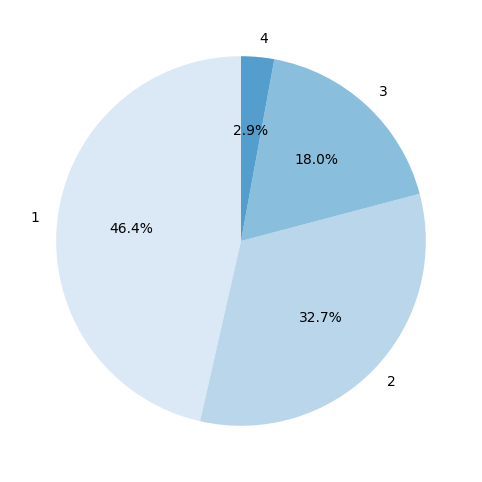

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



family_income_counts = df['Family_Income'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(family_income_counts, labels=family_income_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Blues'))




In [ ]:

df['Family_Income'].value_counts()

Family_Income
1    209
2    147
3     81
4     13
Name: count, dtype: int64

In [ ]:
# Review categorical and numerical values

def filter_categorical_numeric_columns(dataframe):
    categorical_columns = dataframe.select_dtypes(include=['object', 'category']).columns
    numeric_columns = dataframe.select_dtypes(include=['number']).columns
    return categorical_columns, numeric_columns

# Filter categorical and numeric variables
categorical_cols, numeric_cols = filter_categorical_numeric_columns(df)

print("Categorics:")
print(categorical_cols)
print("\nNumerics:")
print(numeric_cols)

Categorics:
Index([], dtype='object')

Numerics:
Index(['Mother_UID', 'Yrs_Of_Marriage', 'Sibling', 'No_of_sibling',
       'Education', 'Hobbies_a', 'Hobbies_b', 'Hobbies_c', 'Hobbies_d',
       'Hobbies_e', 'Hobbies_f', 'Hobbies_g', 'Leave_a', 'Family_Support_a',
       'Family_Support_b', 'Family_Support_c', 'You_Support_a',
       'You_Support_b', 'You_Support_c', 'Exercise_a', 'Exercise_b',
       'Exercise_c', 'Laptop_a', 'Laptop_b', 'Laptop_c', 'Outside_Food_a',
       'Outside_Food_b', 'Outside_Food_c', 'Tea_Coffee_a', 'Tea_Coffee_b',
       'Tea_Coffee_c', 'Cigratte_a', 'Cigratte_b', 'Cigratte_c', 'Alcohol_a',
       'Alcohol_b', 'Alcohol_c', 'NOISE_AIR_pollution_a',
       'NOISE_AIR_pollution_b', 'NOISE_AIR_pollution_c', 'Travel_Time_a',
       'Travel_Time_b', 'Travel_Time_c', 'Travel_Mode_a', 'Travel_Mode_b',
       'Travel_Mode_c', 'Works_As_a', 'Works_As_b', 'Contraceptive_Time_a',
       'Contraceptive_Type_a', 'Intercourse_a', 'Cravings_a', 'Cravings_b',
       'Cravin

In [ ]:

#Separate categorical and numberical columns
cat_col = df.dtypes[df.dtypes == 'object'].index.tolist()
num_col = df.dtypes[df.dtypes != 'object'].index.tolist()

print(f"Total number of categorical columns: {len(cat_col)}")
print(f"Total number of numerical columns: {len(num_col)}")

Total number of categorical columns: 0
Total number of numerical columns: 55


In [ ]:
# This function gives the distribution of variables, their relationship with the target variable and the probability of Family_Income on a variable basis.

def analyze_category(df, category_column, target_column='Family_Income'):


    # Grouping
    grouped_data = df.groupby([category_column, target_column]).size().reset_index(name='count')

    # Bar Chart
    plt.figure(figsize=(30, 6))
    sns.barplot(data=grouped_data, x=category_column, y='count', hue=target_column)
    plt.title(f'Number of mothers by {category_column} type')
    plt.xlabel(category_column)
    plt.ylabel('Count')
    plt.show()

In [ ]:


df["No_of_sibling"].value_counts()

No_of_sibling
0.0    101
1.0     68
2.0     22
3.0      9
Name: count, dtype: int64

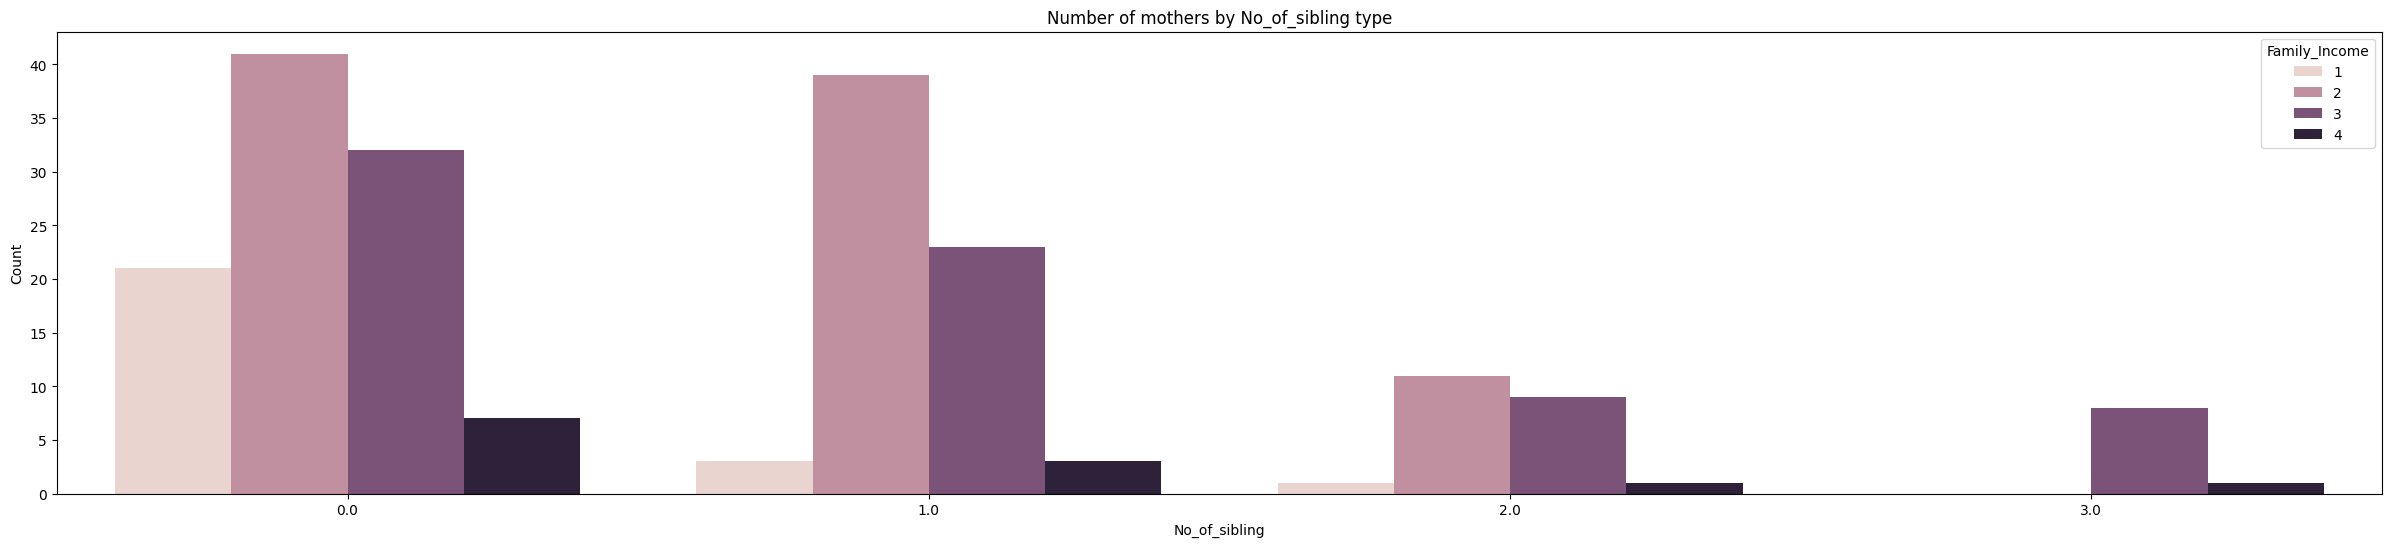

In [ ]:
analyze_category(df, 'No_of_sibling')



##### Bivariate analysis

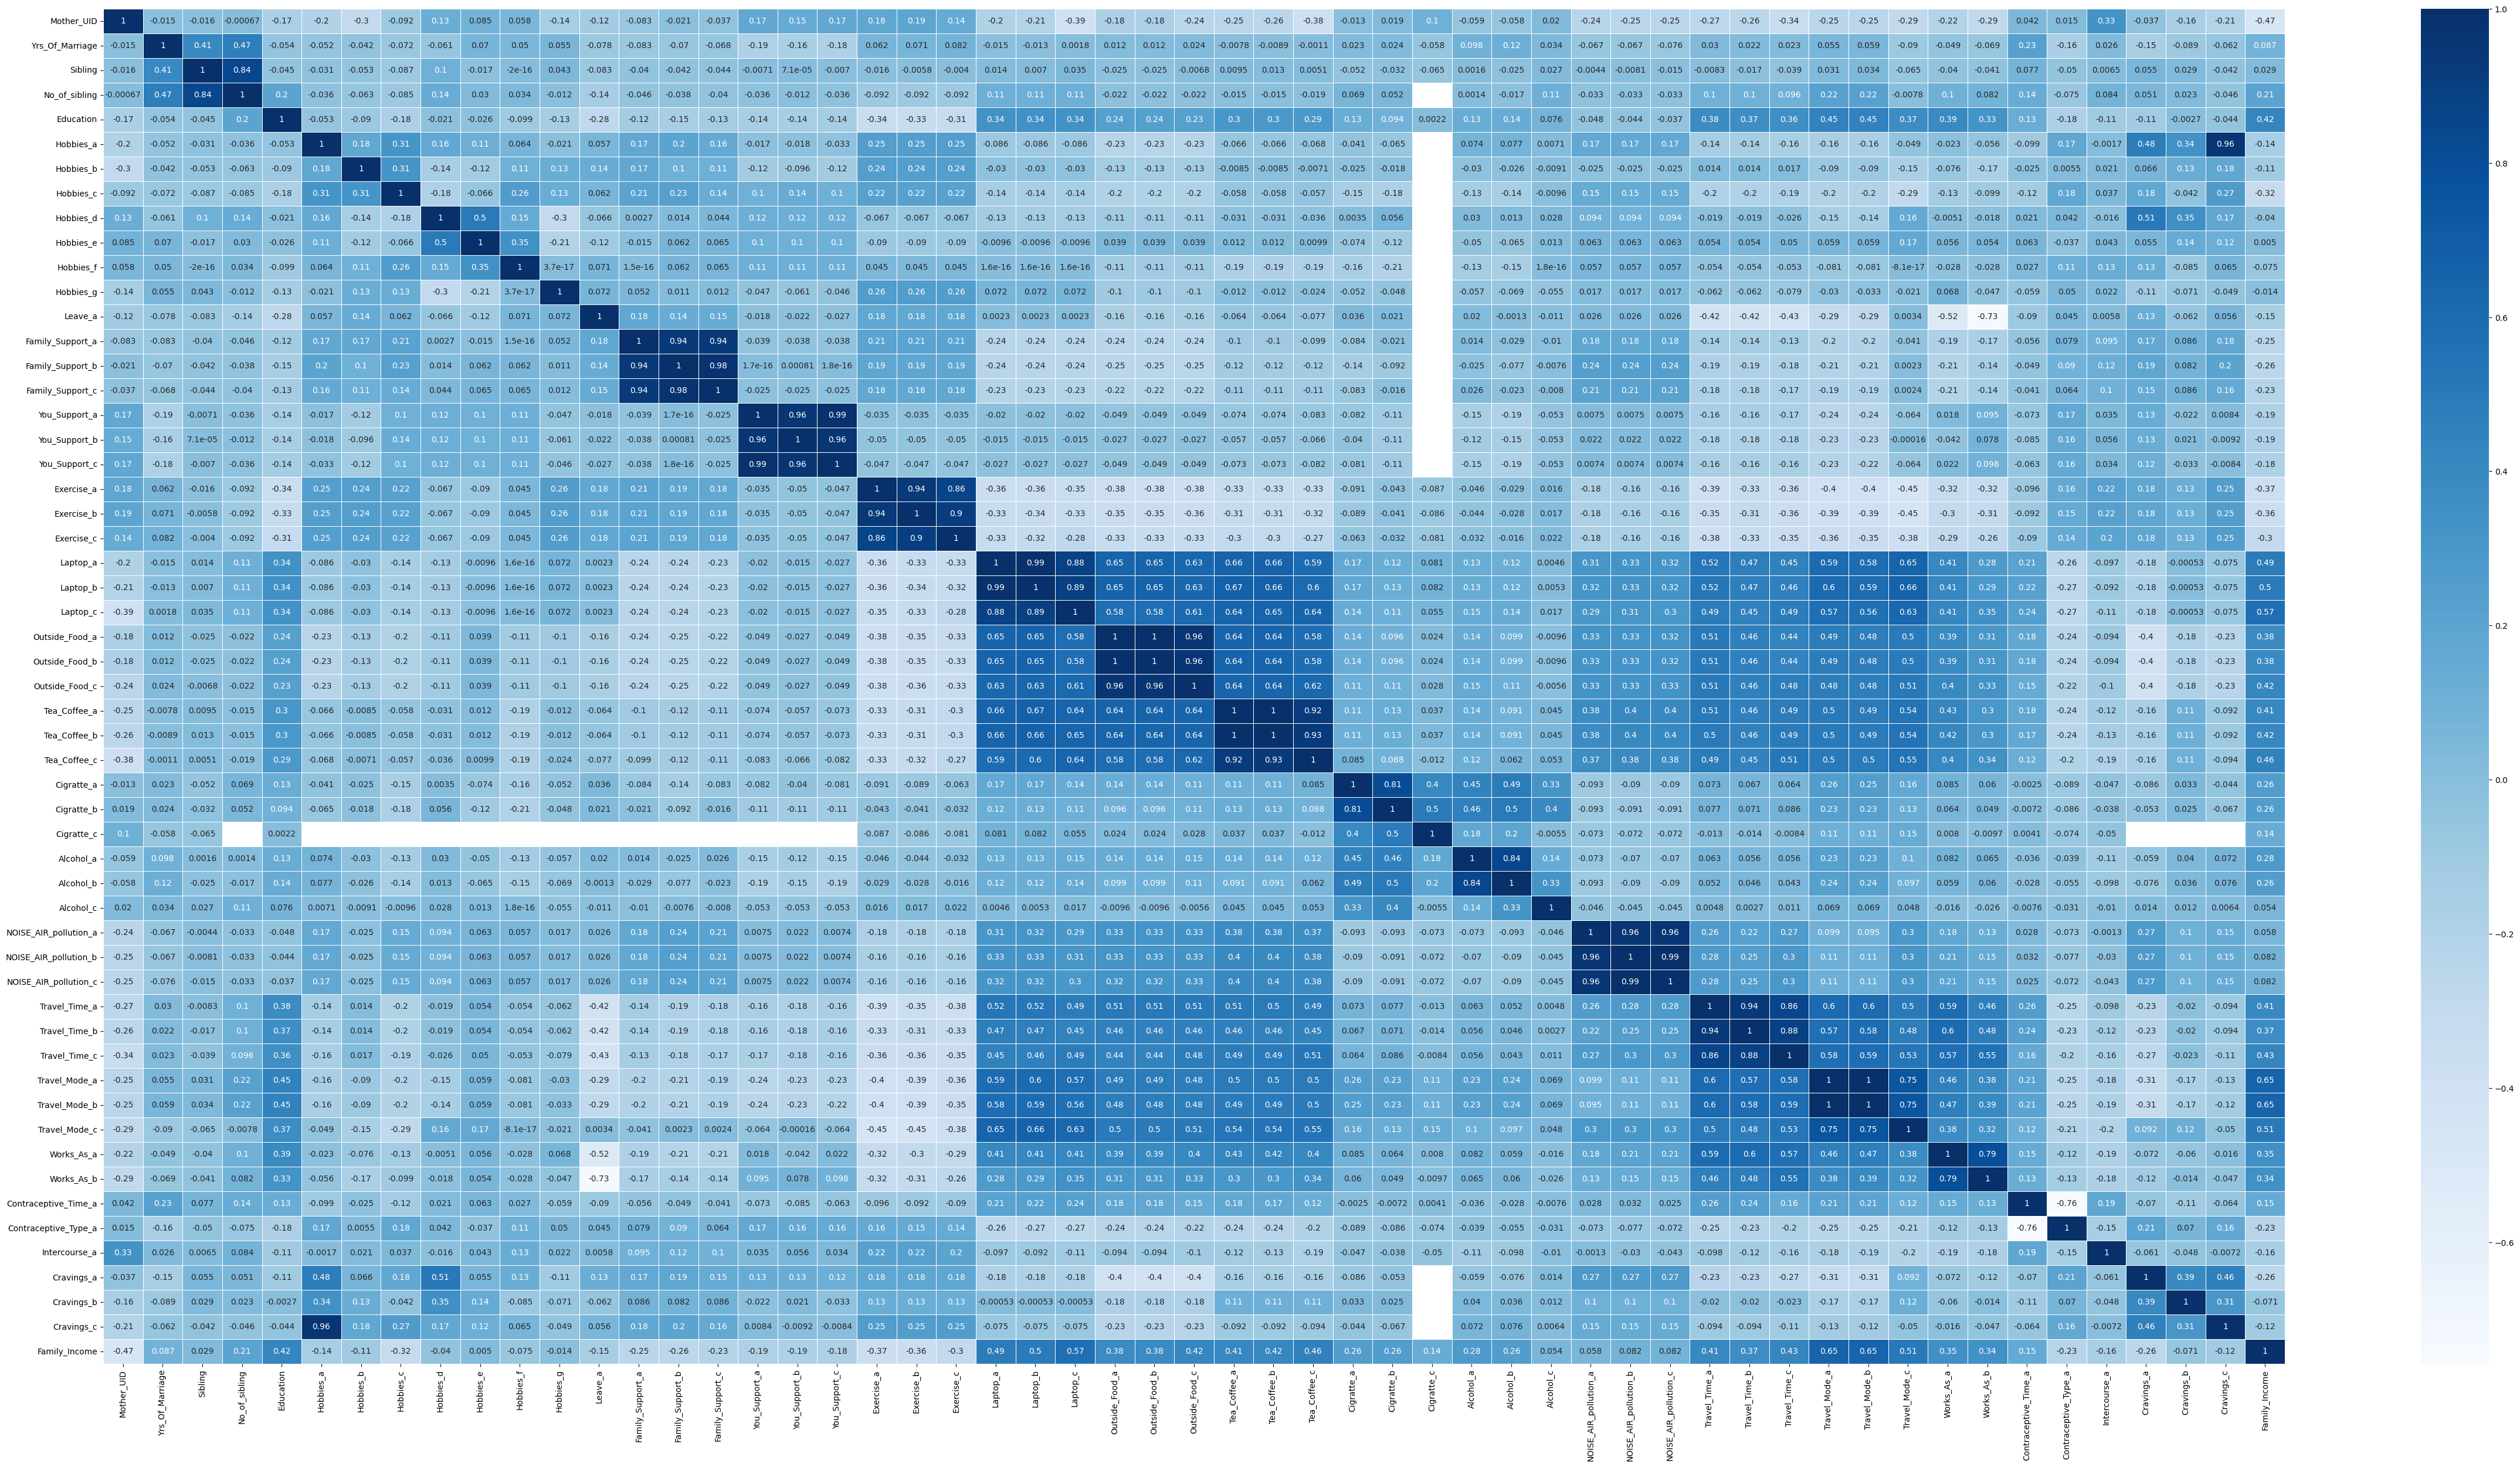

In [ ]:
# Generating heatmap

plt.figure(figsize=(60,30))
sns.heatmap(df.corr(), annot=True,linewidths=0.5,cmap="Blues")
plt.show()

## **Data Cleaning**

Handling Missing Values

In [ ]:
#Amount of missing values

df.isnull().sum()

Mother_UID                 0
Yrs_Of_Marriage            0
Sibling                    0
No_of_sibling            250
Education                  0
Hobbies_a                250
Hobbies_b                250
Hobbies_c                250
Hobbies_d                250
Hobbies_e                250
Hobbies_f                250
Hobbies_g                250
Leave_a                  250
Family_Support_a         250
Family_Support_b         250
Family_Support_c         250
You_Support_a            250
You_Support_b            250
You_Support_c            250
Exercise_a                 0
Exercise_b                 0
Exercise_c                 0
Laptop_a                   0
Laptop_b                   0
Laptop_c                   0
Outside_Food_a             0
Outside_Food_b             0
Outside_Food_c             0
Tea_Coffee_a               0
Tea_Coffee_b               0
Tea_Coffee_c               0
Cigratte_a                 0
Cigratte_b                 0
Cigratte_c                 0
Alcohol_a                  0
Alcohol_b                  0
Alcohol_c                  0
NOISE_AIR_pollution_a      0
NOISE_AIR_pollution_b      0
NOISE_AIR_pollution_c      0
Travel_Time_a              0
Travel_Time_b              0
Travel_Time_c              0
Travel_Mode_a              0
Travel_Mode_b              0
Travel_Mode_c              0
Works_As_a                 0
Works_As_b                 0
Contraceptive_Time_a       0
Contraceptive_Type_a       0
Intercourse_a              0
Cravings_a               250
Cravings_b               250
Cravings_c               250
Family_Income              0
dtype: int64

In [ ]:
#Percentage of missing values

missing_percentage = df.isnull().mean() * 100
print("Percentage of missing values for each column:")
print(missing_percentage)

Percentage of missing values for each column:
Mother_UID                0.000000
Yrs_Of_Marriage           0.000000
Sibling                   0.000000
No_of_sibling            55.555556
Education                 0.000000
Hobbies_a                55.555556
Hobbies_b                55.555556
Hobbies_c                55.555556
Hobbies_d                55.555556
Hobbies_e                55.555556
Hobbies_f                55.555556
Hobbies_g                55.555556
Leave_a                  55.555556
Family_Support_a         55.555556
Family_Support_b         55.555556
Family_Support_c         55.555556
You_Support_a            55.555556
You_Support_b            55.555556
You_Support_c            55.555556
Exercise_a                0.000000
Exercise_b                0.000000
Exercise_c                0.000000
Laptop_a                  0.000000
Laptop_b                  0.000000
Laptop_c                  0.000000
Outside_Food_a            0.000000
Outside_Food_b            0.000000
Outside_F

In [ ]:
#Visualising the missing values

#Missingno library to visualize the distribution of NaN values.

!pip install missingno

<Axes: >

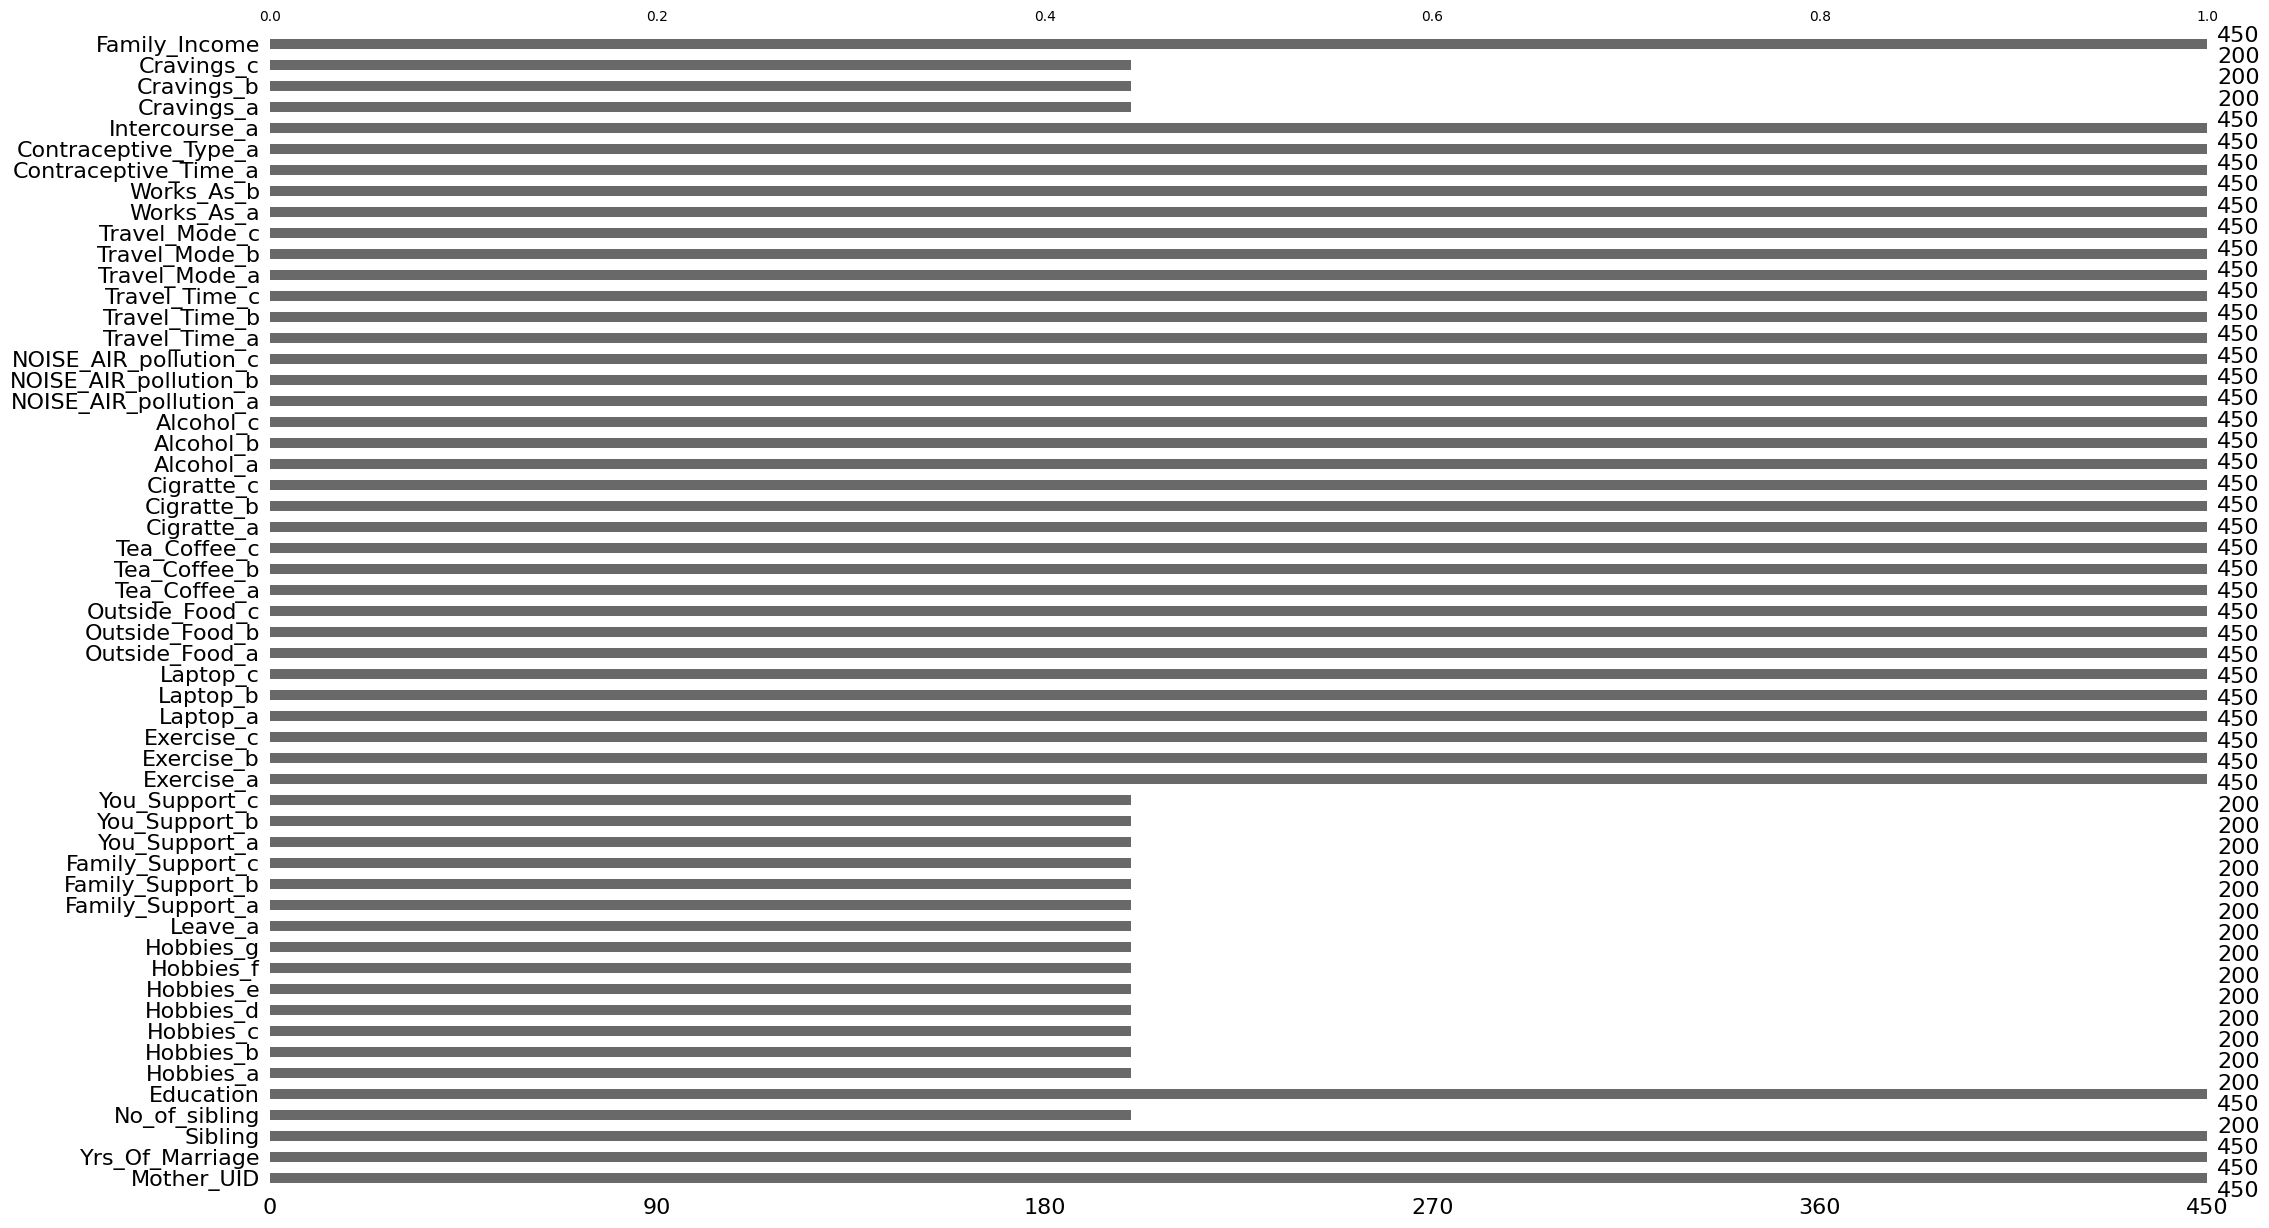

In [ ]:
#Visualizing missing values

#Bars show the values that are proportional to the non-missing data in the dataset.

#import pandas as pd
#import missingno as msno


msno.bar(df)

Impute features with most_frequent values in the columns

In [ ]:

#from sklearn.impute import SimpleImputer


impute_mode = SimpleImputer(strategy = 'most_frequent')
impute_mode.fit(df[['No_of_sibling', 'Hobbies_a', 'Hobbies_b', 'Hobbies_c', 'Hobbies_d', 'Hobbies_e', 'Hobbies_f', 'Hobbies_g', 'Leave_a', 'Family_Support_a', 'Family_Support_b', 'Family_Support_c', 'You_Support_a', 'You_Support_b', 'You_Support_c', 'Cravings_a', 'Cravings_b', 'Cravings_c']])

df[['No_of_sibling', 'Hobbies_a', 'Hobbies_b', 'Hobbies_c', 'Hobbies_d', 'Hobbies_e', 'Hobbies_f', 'Hobbies_g', 'Leave_a', 'Family_Support_a', 'Family_Support_b', 'Family_Support_c', 'You_Support_a', 'You_Support_b', 'You_Support_c', 'Cravings_a', 'Cravings_b', 'Cravings_c']] = impute_mode.transform(df[['No_of_sibling', 'Hobbies_a', 'Hobbies_b', 'Hobbies_c', 'Hobbies_d', 'Hobbies_e', 'Hobbies_f', 'Hobbies_g', 'Leave_a', 'Family_Support_a', 'Family_Support_b', 'Family_Support_c', 'You_Support_a', 'You_Support_b', 'You_Support_c', 'Cravings_a', 'Cravings_b', 'Cravings_c']])


<Axes: >

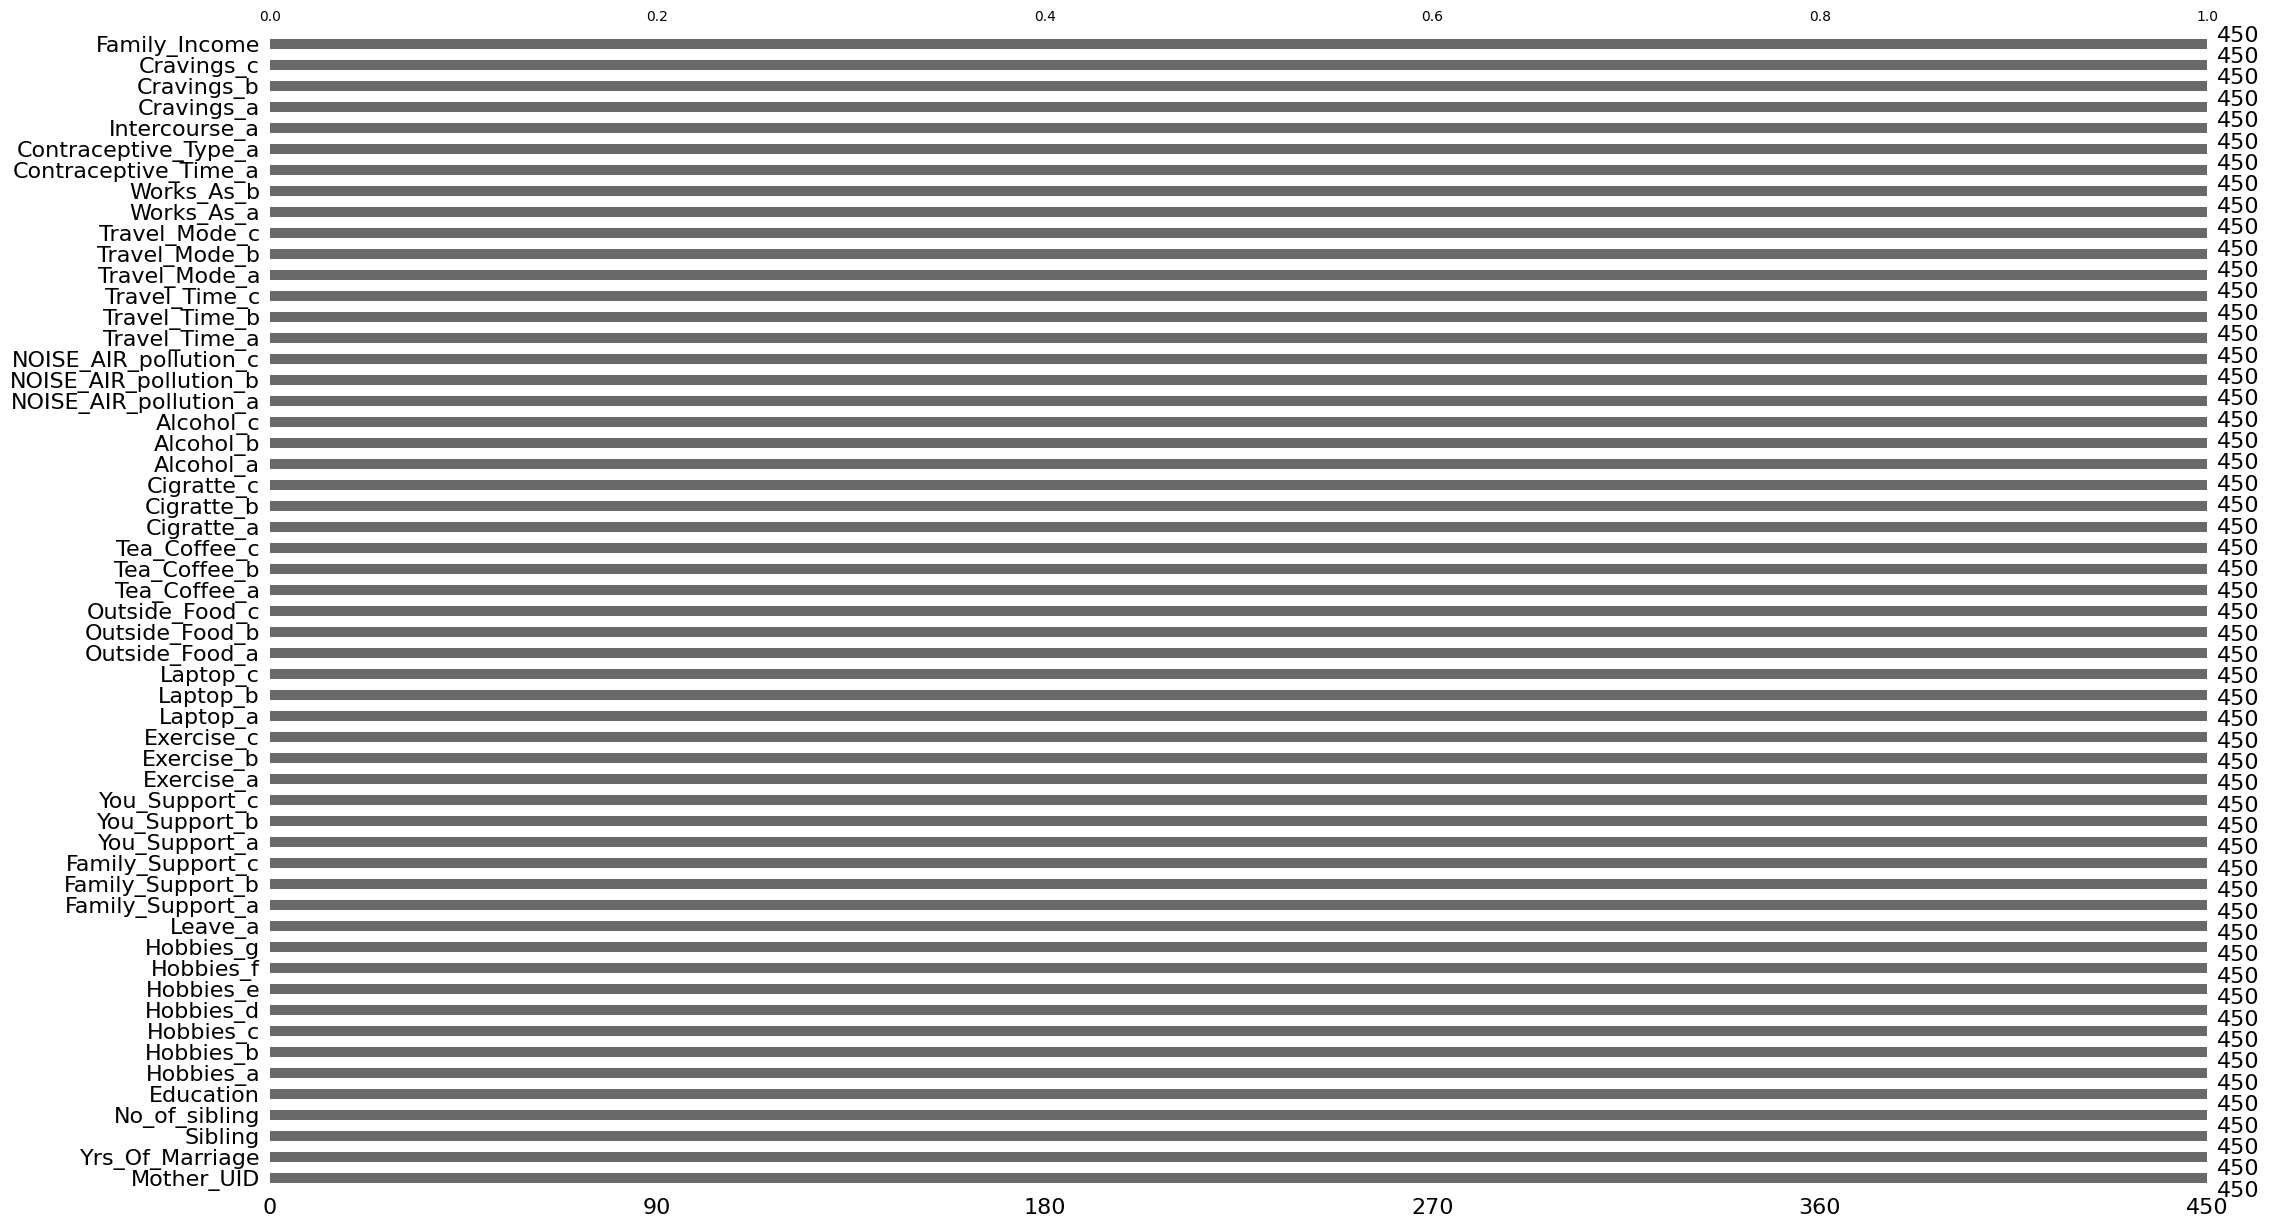

In [ ]:
#Visualizing the dataset after applying Simple Imputer.

#import pandas as pd
#import missingno as msno


msno.bar(df)

In [ ]:
missing_after_imputation = df.isnull().sum()
print("Missing values after imputation:")
print(missing_after_imputation)

Missing values after imputation:
Mother_UID               0
Yrs_Of_Marriage          0
Sibling                  0
No_of_sibling            0
Education                0
Hobbies_a                0
Hobbies_b                0
Hobbies_c                0
Hobbies_d                0
Hobbies_e                0
Hobbies_f                0
Hobbies_g                0
Leave_a                  0
Family_Support_a         0
Family_Support_b         0
Family_Support_c         0
You_Support_a            0
You_Support_b            0
You_Support_c            0
Exercise_a               0
Exercise_b               0
Exercise_c               0
Laptop_a                 0
Laptop_b                 0
Laptop_c                 0
Outside_Food_a           0
Outside_Food_b           0
Outside_Food_c           0
Tea_Coffee_a             0
Tea_Coffee_b             0
Tea_Coffee_c             0
Cigratte_a               0
Cigratte_b               0
Cigratte_c               0
Alcohol_a                0
Alcohol_b             

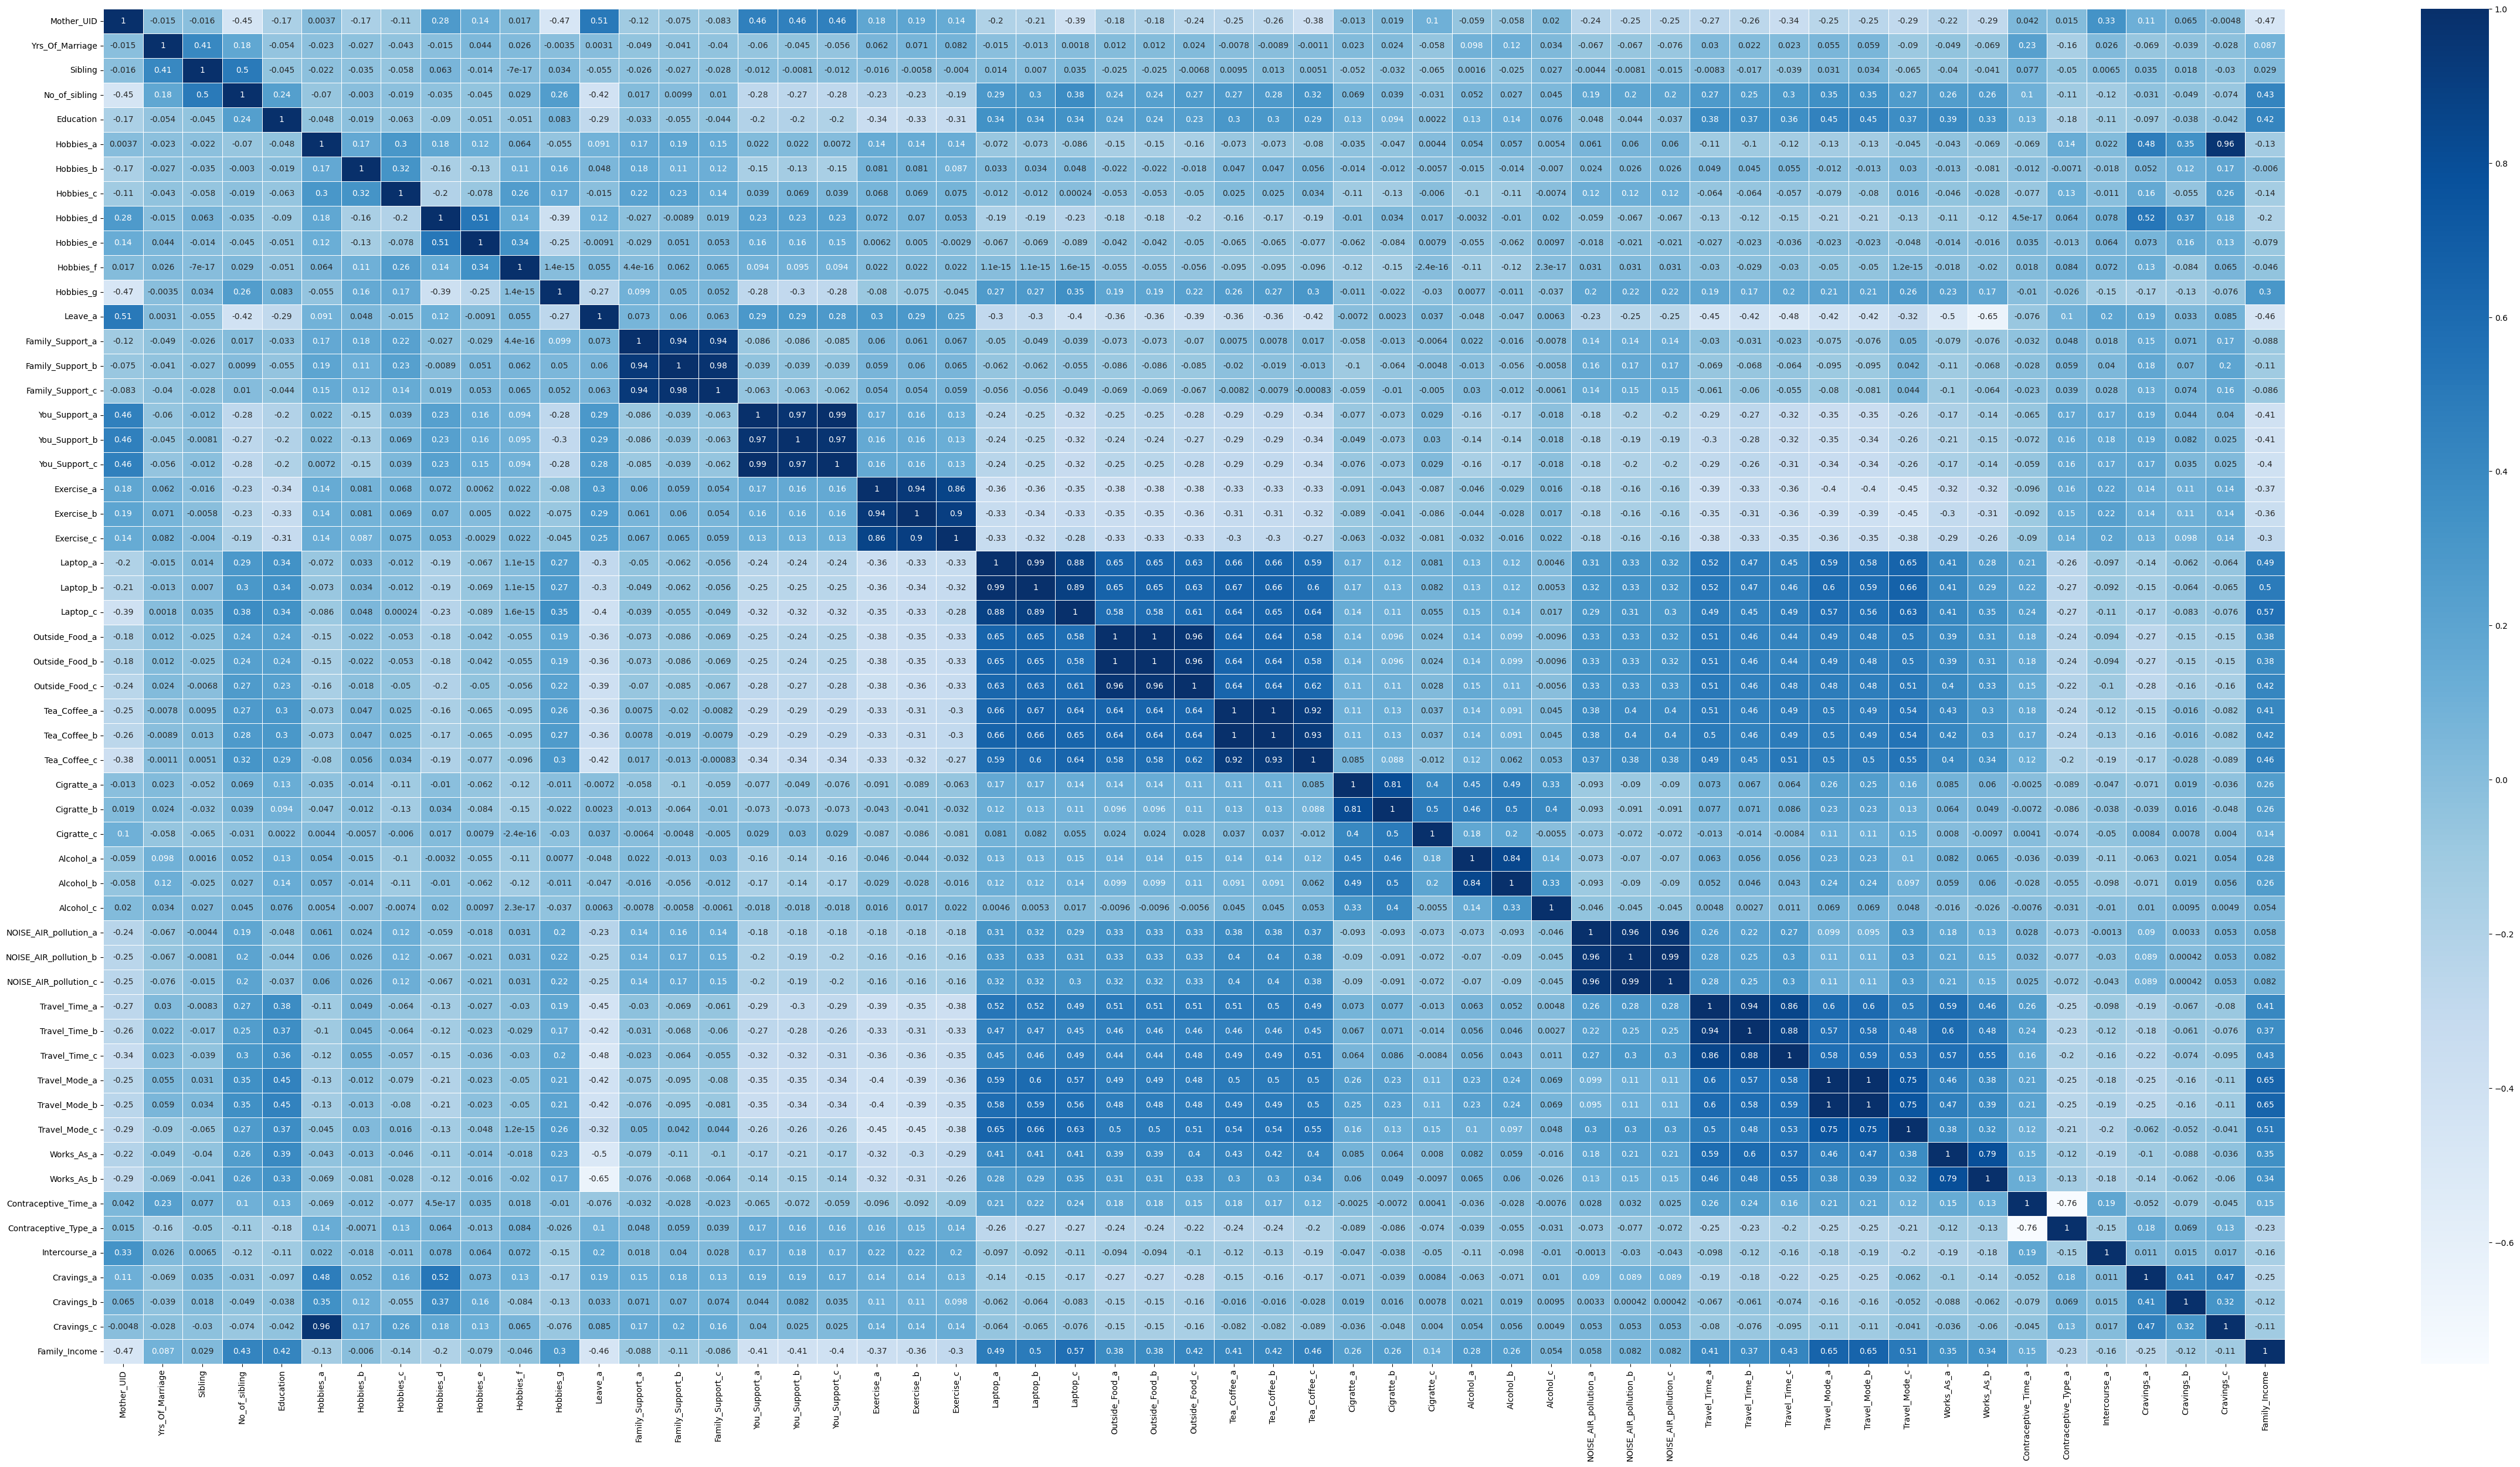

In [ ]:
plt.figure(figsize=(60,30))
sns.heatmap(df.corr(), annot=True,linewidths=0.5,cmap="Blues")
plt.show()

In [ ]:
#No Duplicate Rows

duplicates = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicates)

Duplicate Rows:
Empty DataFrame
Columns: [Mother_UID, Yrs_Of_Marriage, Sibling, No_of_sibling, Education, Hobbies_a, Hobbies_b, Hobbies_c, Hobbies_d, Hobbies_e, Hobbies_f, Hobbies_g, Leave_a, Family_Support_a, Family_Support_b, Family_Support_c, You_Support_a, You_Support_b, You_Support_c, Exercise_a, Exercise_b, Exercise_c, Laptop_a, Laptop_b, Laptop_c, Outside_Food_a, Outside_Food_b, Outside_Food_c, Tea_Coffee_a, Tea_Coffee_b, Tea_Coffee_c, Cigratte_a, Cigratte_b, Cigratte_c, Alcohol_a, Alcohol_b, Alcohol_c, NOISE_AIR_pollution_a, NOISE_AIR_pollution_b, NOISE_AIR_pollution_c, Travel_Time_a, Travel_Time_b, Travel_Time_c, Travel_Mode_a, Travel_Mode_b, Travel_Mode_c, Works_As_a, Works_As_b, Contraceptive_Time_a, Contraceptive_Type_a, Intercourse_a, Cravings_a, Cravings_b, Cravings_c, Family_Income]
Index: []

[0 rows x 55 columns]


In [ ]:
#define the predictor variables and the response variable

x= df[['Mother_UID', 'Yrs_Of_Marriage', 'Sibling', 'No_of_sibling',
       'Education', 'Hobbies_a', 'Hobbies_b', 'Hobbies_c', 'Hobbies_d',
       'Hobbies_e', 'Hobbies_f', 'Hobbies_g', 'Leave_a', 'Family_Support_a',
       'Family_Support_b', 'Family_Support_c', 'You_Support_a',
       'You_Support_b', 'You_Support_c', 'Exercise_a', 'Exercise_b',
       'Exercise_c', 'Laptop_a', 'Laptop_b', 'Laptop_c', 'Outside_Food_a',
       'Outside_Food_b', 'Outside_Food_c', 'Tea_Coffee_a', 'Tea_Coffee_b',
       'Tea_Coffee_c', 'Cigratte_a', 'Cigratte_b', 'Cigratte_c', 'Alcohol_a',
       'Alcohol_b', 'Alcohol_c', 'NOISE_AIR_pollution_a',
       'NOISE_AIR_pollution_b', 'NOISE_AIR_pollution_c', 'Travel_Time_a',
       'Travel_Time_b', 'Travel_Time_c', 'Travel_Mode_a', 'Travel_Mode_b',
       'Travel_Mode_c', 'Works_As_a', 'Works_As_b', 'Contraceptive_Time_a',
       'Contraceptive_Type_a', 'Intercourse_a', 'Cravings_a', 'Cravings_b',
       'Cravings_c']]


y= df['Family_Income']  # dependent variable

In [ ]:
#Pair plots: To explore relationships between multiple variables simultaneously

#sns.pairplot(df, hue='Family_Income')

In [ ]:
x.shape

(450, 54)

In [ ]:
x.columns

Index(['Mother_UID', 'Yrs_Of_Marriage', 'Sibling', 'No_of_sibling',
       'Education', 'Hobbies_a', 'Hobbies_b', 'Hobbies_c', 'Hobbies_d',
       'Hobbies_e', 'Hobbies_f', 'Hobbies_g', 'Leave_a', 'Family_Support_a',
       'Family_Support_b', 'Family_Support_c', 'You_Support_a',
       'You_Support_b', 'You_Support_c', 'Exercise_a', 'Exercise_b',
       'Exercise_c', 'Laptop_a', 'Laptop_b', 'Laptop_c', 'Outside_Food_a',
       'Outside_Food_b', 'Outside_Food_c', 'Tea_Coffee_a', 'Tea_Coffee_b',
       'Tea_Coffee_c', 'Cigratte_a', 'Cigratte_b', 'Cigratte_c', 'Alcohol_a',
       'Alcohol_b', 'Alcohol_c', 'NOISE_AIR_pollution_a',
       'NOISE_AIR_pollution_b', 'NOISE_AIR_pollution_c', 'Travel_Time_a',
       'Travel_Time_b', 'Travel_Time_c', 'Travel_Mode_a', 'Travel_Mode_b',
       'Travel_Mode_c', 'Works_As_a', 'Works_As_b', 'Contraceptive_Time_a',
       'Contraceptive_Type_a', 'Intercourse_a', 'Cravings_a', 'Cravings_b',
       'Cravings_c'],
      dtype='object')

In [ ]:
# Create a list of numerical and categorical features, so that it can be easy to select one or the other later


num_features = ['Mother_UID', 'Yrs_Of_Marriage', 'Sibling', 'No_of_sibling',
       'Education', 'Hobbies_a', 'Hobbies_b', 'Hobbies_c', 'Hobbies_d',
       'Hobbies_e', 'Hobbies_f', 'Hobbies_g', 'Leave_a', 'Family_Support_a',
       'Family_Support_b', 'Family_Support_c', 'You_Support_a',
       'You_Support_b', 'You_Support_c', 'Exercise_a', 'Exercise_b',
       'Exercise_c', 'Laptop_a', 'Laptop_b', 'Laptop_c', 'Outside_Food_a',
       'Outside_Food_b', 'Outside_Food_c', 'Tea_Coffee_a', 'Tea_Coffee_b',
       'Tea_Coffee_c', 'Cigratte_a', 'Cigratte_b', 'Cigratte_c', 'Alcohol_a',
       'Alcohol_b', 'Alcohol_c', 'NOISE_AIR_pollution_a',
       'NOISE_AIR_pollution_b', 'NOISE_AIR_pollution_c', 'Travel_Time_a',
       'Travel_Time_b', 'Travel_Time_c', 'Travel_Mode_a', 'Travel_Mode_b',
       'Travel_Mode_c', 'Works_As_a', 'Works_As_b', 'Contraceptive_Time_a',
       'Contraceptive_Type_a', 'Intercourse_a', 'Cravings_a', 'Cravings_b',
       'Cravings_c']



In [ ]:
# Shape for x and y

print('Shape of x: {}'.format(x.shape))
print('Shape of y: {}'.format(y.shape))

Shape of x: (450, 54)
Shape of y: (450,)


## **Train Test Split**

In [ ]:
# #Given this data is imbalanced, there is need to maintain the balance ratio when splitting this dataset into training and test sets.
# Use StratifiedShuffleSplit to maintain this ratio.


 # from sklearn.model_selection import StratifiedShuffleSplit


# Stratified split
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, stratify=y, random_state=1)

x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=1)


In [ ]:

# Printing the class distributions in the original dataset and the split sets
print('Original Class Distribution:')
print(f"Class 1: {np.sum(y == 1)}, Class 2: {np.sum(y == 2)}, Class 3: {np.sum(y == 3)}, Class 4: {np.sum(y == 4)}\n")




print('Training Set Class Distribution:')
print(f"Class 1: {np.sum(y_train == 1)}, Class 2: {np.sum(y_train == 2)}, Class 3: {np.sum(y_train == 3)}, Class 4: {np.sum(y_train == 4)}\n")



print('Validation Set Class Distribution:')
print(f"Class 1: {np.sum(y_val == 1)}, Class 2: {np.sum(y_val == 2)}, Class 3: {np.sum(y_val == 3)}, Class 4: {np.sum(y_val == 4)}\n")




print('Test Set Class Distribution:')
print(f"Class 1: {np.sum(y_test == 1)}, Class 2: {np.sum(y_test == 2)}, Class 3: {np.sum(y_test == 3)}, Class 4: {np.sum(y_test == 4)}\n")


Original Class Distribution:
Class 1: 209, Class 2: 147, Class 3: 81, Class 4: 13

Training Set Class Distribution:
Class 1: 146, Class 2: 103, Class 3: 57, Class 4: 9

Validation Set Class Distribution:
Class 1: 31, Class 2: 22, Class 3: 12, Class 4: 2

Test Set Class Distribution:
Class 1: 32, Class 2: 22, Class 3: 12, Class 4: 2



In [ ]:
# Save the datasets

import joblib

joblib.dump(x_train, 'x_train.pkl')
joblib.dump(y_train, 'y_train.pkl')
joblib.dump(x_test, 'x_test.pkl')
joblib.dump(y_test, 'y_test.pkl')

['y_test.pkl']

In [ ]:
x_train.shape


(315, 54)

In [ ]:
y_train.shape


(315,)

In [ ]:
x_test.shape


(68, 54)

In [ ]:
y_test.shape

(68,)

## **SMOTE with Imbalance Data**

In [ ]:
#SMOTE(Synthetic Minority Oversampling Technique) works by randomly picking a data point from a minority class and computing the K-Nearest Neighbour from that point,
#and adding random points between this chosen point and its neighbors


from imblearn.over_sampling import SMOTE


#The correct application of oversampling is to apply the method to the training dataset only,
#then evaluate the model on the stratified but non-transformed test set.

print("Before OverSampling, counts of label '1' in y_train: {} \n".format(sum(y_train==1)))
print("Before OverSampling, counts of label '2' in y_train: {}".format(sum(y_train==2)))
print("Before OverSampling, counts of label '3' in y_train: {}".format(sum(y_train==3)))
print("Before OverSampling, counts of label '4' in y_train: {}".format(sum(y_train==4)))



sm = SMOTE(random_state=1)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

print('After OverSampling, the shape of x_train: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of y_train: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1' in y_train_res: {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '2' in y_train_res: {}".format(sum(y_train_res==2)))
print("After OverSampling, counts of label '3' in y_train_res: {}".format(sum(y_train_res==3)))
print("After OverSampling, counts of label '4' in y_train_res: {}".format(sum(y_train_res==4)))


Before OverSampling, counts of label '1' in y_train: 146 

Before OverSampling, counts of label '2' in y_train: 103
Before OverSampling, counts of label '3' in y_train: 57
Before OverSampling, counts of label '4' in y_train: 9
After OverSampling, the shape of x_train: (584, 54)
After OverSampling, the shape of y_train: (584,) 

After OverSampling, counts of label '1' in y_train_res: 146
After OverSampling, counts of label '2' in y_train_res: 146
After OverSampling, counts of label '3' in y_train_res: 146
After OverSampling, counts of label '4' in y_train_res: 146


In [ ]:
!pip install --upgrade catboost --no-cache-dir --force-reinstall


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 135.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 140.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 159.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.5/102.5 kB 149.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 78.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 131.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 94.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 87.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.2/326.2 kB 136.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## **CatBoost Model**

In [ ]:
!pip install --upgrade catboost




Training CatBoost Model

In [ ]:
from catboost import CatBoostClassifier, Pool



cat_modell = CatBoostClassifier()

cat_modell.fit(x_train_res, y_train_res)   # Training the model


NameError: name 'x_train_res' is not defined

Model Evaluation - CatBoost

In [ ]:
#Check classification_report
y_pred_catboost = cat_modell.predict(x_test)
print(classification_report(y_test, y_pred_catboost))



In [ ]:
cat_modell.save_model('cat_modell.cbm')

In [ ]:
import joblib
# save the model

joblib.dump(cat_modell, "./cat_modellll.joblib")


In [ ]:
# Print the Confusion Matrix and slice it into four pieces

cm = confusion_matrix(y_test, y_pred_catboost)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])



In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot non-normalized and normalized confusion matrix
plt.rcParams["figure.figsize"] = (5,5)
titles_options = [
    ("Confusion matrix", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        cat_modell,x_test,y_test,
        cmap=plt.cm.Reds,
        normalize=normalize,
    )
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
plt.show()

In [ ]:
#k-Fold Cross Validation

# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(cat_modell, x_val, y_val, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

In [ ]:
# summarize the cross-validation accuracy by calculating its mean.
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

## **RANDOM FOREST MODEL (RF)**

Training Random Forest

In [ ]:

# Creating/instantiate the model

rf_model = RandomForestClassifier(random_state = 1)

In [ ]:
#Training the model
rf_model.fit(x_train_res, y_train_res)

Model Evaluation - Random Forest

In [ ]:
import joblib
# save the model

joblib.dump(rf_model, "./rf_modelll.joblib")


In [ ]:
# Generate predictions on the testing dataset and check accuracy and classification report.


y_predrf = rf_model.predict(x_test)                      # Make prediction on the testing data

print(classification_report(y_test, y_predrf))              # Classification Report


In [ ]:
# Print the Confusion Matrix and slice it into four pieces

cm = confusion_matrix(y_test, y_predrf)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])



In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot non-normalized and normalized confusion matrix
plt.rcParams["figure.figsize"] = (5,5)
titles_options = [
    ("Confusion matrix", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        rf_model,x_test,y_test,
        cmap=plt.cm.Reds,
        normalize=normalize,
    )
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
plt.show()

In [ ]:
#k-Fold Cross Validation

# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_model, x_val, y_val, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

In [ ]:
# summarize the cross-validation accuracy by calculating its mean.
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Feature Importance - Random Forest Classifier

In [ ]:


#Building the Random Forest and computing the individual feature importances

# Building the model
random_forest_fi = RandomForestClassifier(n_estimators = 5,
										criterion ='entropy', max_features = 2)

# Training the model
random_forest_fi.fit(x_train_res, y_train_res)

# Computing the importance of each feature
feature_importance = random_forest_fi.feature_importances_

# Normalizing the individual importances
feature_importance_normalized_rf = np.std([tree.feature_importances_ for tree in
										random_forest_fi.estimators_],
										axis = 0)


In [ ]:
#Visualizing and Comparing the results

# Plotting a Bar Graph

import plotly
import matplotlib.pyplot as plt


np.random.seed(0)



indices = np.argsort(feature_importance_normalized_rf)
features = x.columns

plt.title('Comparison of different Feature Importances using Random Forest Classifier')
plt.rcParams['figure.figsize'] = [130, 120]
plt.barh(range(len(indices)), feature_importance_normalized_rf[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Feature Importances')
plt.show()


# **Model Interpretability (Random Forest)**

ELI5

In [ ]:

!pip install eli5


In [ ]:
# Create a new list with all names of features
all_features = num_features

In [ ]:
# Find the weight given to each feature in prediction
# ELI5 does nothing new for calculating feature weights.
# It simply uses the GINI index used for preparing decision trees as weights.


# Global Interpretation:
# Inspect model parameters and try to figure out how the model works globally.



import eli5 as eli

eli.explain_weights(rf_model,  feature_names=list(x_train_res.columns),)

In [ ]:
# Local Interpretation : Inspect an individual prediction of a model,
# try to figure out why the model makes the decision it makes.

eli.show_prediction(rf_model, x_test.iloc[3],
                    feature_names=list(x_train_res.columns),
                    show_feature_values=True)


#  See and compare what combination of features and values lead to a particular prediction.

# In ELI5, a prediction is basically the sum of positive features inclusive of bias.

Permutation Importance




In [ ]:
#  # Build a new Permutation Importance object for rf_model and fit it on the test data. Confirm the most important features here.

# eli5 implements another technique called Permutation Importance that is model agnostic and works for any black box model.
# By shuffling at random the values of a feature, observetions how that affects the predictions and quantify how important that feature is can be seen.



import eli5
from eli5.sklearn import PermutationImportance


# create permutation importance object using model
# and fit on test set
perm = PermutationImportance(rf_model, random_state=0).fit(x_test, y_test)

# display weights using PermutationImportance object
eli5.show_weights(perm, feature_names=all_features)





## **Training Logistic Regression Model**

In [ ]:

# Logistic Regression


from sklearn.linear_model import LogisticRegression


lr_model = LogisticRegression()


In [ ]:
#Training the model
lr_model.fit(x_train_res, y_train_res)

Model Evaluation (Logistic Regression)


In [ ]:
import joblib
# save the model

joblib.dump(lr_model, "./lr_modell.joblib")


In [ ]:

# Generate predictions on the testing dataset and check accuracy and classification report.


y_predlr = lr_model.predict(x_test)
print(balanced_accuracy_score(y_test, y_predlr))
print(classification_report(y_test, y_predlr))


In [ ]:

# Print the Confusion Matrix and slice it into four pieces

cm = confusion_matrix(y_test, y_predlr)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])



In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot non-normalized and normalized confusion matrix
plt.rcParams["figure.figsize"] = (5,5)
titles_options = [
    ("Confusion matrix", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
       lr_model,x_test,y_test,
        cmap=plt.cm.Reds,
        normalize=normalize,
    )
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
plt.show()

In [ ]:
#k-Fold Cross Validation

# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr_model, x_val, y_val, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

In [ ]:
#Summarize the cross-validation accuracy by calculating its mean.
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

# **Model Interpretability (Logistic regression)**

ELI5

In [ ]:


#visualise the weights associated to each feature in making the prediction

import eli5

eli5.show_weights(lr_model, feature_names=all_features)



# Here if several Opportunistic Infections attack/affect the body, it increases the probability of the HIV patient to experience Viral Rebound significantly.

In [ ]:
# To explain a specific prediction, let's pick a row in the test data:



eli5.show_prediction(lr_model, np.array(x_test)[3],
                     feature_names=all_features,
                     show_feature_values=True)


# Local Interpretation : inspect an individual prediction of a model, try to figure out why the model makes the decision it makes.



# The contribution column is multiplication of Value of the feature & weight determined by eli5 for it.

# Here eli5 does something really simple: knowing the weights associated to each feature and the actual value for all features for this specific observation,
# it can compute the contribution of each feature towards the prediction

Permutation Importance

In [ ]:

import eli5
from eli5.sklearn import PermutationImportance


# create permutation importance object using model
# and fit on test set
perm_lr = PermutationImportance(lr_model, random_state=1).fit(x_test, y_test)

# display weights using PermutationImportance object
eli5.show_weights(perm_lr, feature_names=all_features)

## **Decision Tree Model**

In [ ]:
# Use grid search to find the best parameters for Decision Tree


# Decision Tree
dt_model = DecisionTreeClassifier()


In [ ]:
#Training the model
dt_model.fit(x_train_res, y_train_res)

## **Model Evaluation (Decision Tree)**

In [ ]:
import joblib
# save the model

joblib.dump(dt_model, "./dt_modelsaved.joblib")


In [ ]:
# Check accuracy and classification report

y_preddt = dt_model.predict(x_test)

print(balanced_accuracy_score(y_test, y_preddt))
print(classification_report(y_test, y_preddt))

In [ ]:

# Print the Confusion Matrix and slice it into four pieces

cm = confusion_matrix(y_test, y_preddt)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])



In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot non-normalized and normalized confusion matrix
plt.rcParams["figure.figsize"] = (5,5)
titles_options = [
    ("Confusion matrix", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
       dt_model,x_test,y_test,
        cmap=plt.cm.Reds,
        normalize=normalize,
    )
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
plt.show()

In [ ]:
#k-Fold Cross Validation

# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_model, x_val, y_val, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

In [ ]:
#Summarize the cross-validation accuracy by calculating its mean.
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

# **Model Interpretability (Decision Tree)**

ELI5

In [ ]:
# Typically for tree-based models ELI5 does nothing special but uses the out-of-the-box feature importance computation methods.

# By default, ‘gain’ is used, that is the average gain of the feature when it is used in trees
# It tells how important different features are on average relative to each other but not how they impact the outcome.

eli5.show_weights(dt_model, feature_names=all_features)




In [ ]:
# To explain a specific prediction, let's pick a row in the test data:



eli5.show_prediction(dt_model, np.array(x_test)[3],
                     feature_names=all_features,
                     show_feature_values=True)


# Local Interpretation : inspect an individual prediction of a model, try to figure out why the model makes the decision it makes.



# The contribution column is multiplication of Value of the feature & weight determined by eli5 for it.

# Here eli5 does something really simple: knowing the weights associated to each feature and the actual value for all features for this specific observation,
# it can compute the contribution of each feature towards the prediction

Permutation Importance

In [ ]:
#  # Build a new Permutation Importance object for dt_model and fit it on the test data. Confirm the most important features here.

# eli5 implements another technique called Permutation Importance that is model agnostic and works for any black box model.
# By shuffling at random the values of a feature, observations how that affects the predictions and quantify how important that feature is can be seen.



import eli5
from eli5.sklearn import PermutationImportance


# create permutation importance object using model
# and fit on test set
perm = PermutationImportance(dt_model, random_state=0).fit(x_test, y_test)

# display weights using PermutationImportance object
eli5.show_weights(perm, feature_names=all_features)





## **Light GBM Model**

Training Light GBM Model

In [ ]:
# LightGBM model
lgb_model = LGBMClassifier()


In [ ]:
#Training the model
lgb_model.fit(x_train_res, y_train_res)

Model Evaluation (Light GBM)

In [ ]:
import joblib
# save the model

joblib.dump(lgb_model, "./lgb_lightgbm_model.joblib")


In [ ]:
# Generate predictions and check the accuracy and classification report

y_predlgb = lgb_model.predict(x_test)
balanced_accuracy_score(y_test, y_predlgb)
print(classification_report(y_test, y_predlgb))

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

cm = confusion_matrix(y_test, y_predlgb)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])



In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot non-normalized and normalized confusion matrix
plt.rcParams["figure.figsize"] = (5,5)
titles_options = [
    ("Confusion matrix", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        lgb_model,x_test,y_test,
        cmap=plt.cm.Reds,
        normalize=normalize,
    )
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
plt.show()

In [ ]:
#k-Fold Cross Validation

# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(lgb_model, x_val, y_val, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

In [ ]:
# summarize the cross-validation accuracy by calculating its mean.
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

# **Model Interpretability ( Light GBM )**

Permutation Importance

In [ ]:
# Build a new Permutation Importance object for your lgb_model and fit it on the test data.



perm = PermutationImportance(lgb_model, scoring="balanced_accuracy")
perm.fit(x_test, y_test)

eli5.show_weights(perm, feature_names=all_features)

In [ ]:
# To explain a specific prediction, let's pick a row in the test data:



eli5.show_prediction(lgb_model, np.array(x_test)[3],
                     feature_names=all_features,
                     show_feature_values=True)


# Local Interpretation : inspect an individual prediction of a model, try to figure out why the model makes the decision it makes.



# The contribution column is multiplication of Value of the feature & weight determined by eli5 for it.

# Here eli5 does something really simple: knowing the weights associated to each feature and the actual value for all features for this specific observation,
# it can compute the contribution of each feature towards the prediction

## **Training Gaussian Naive Bayes (GNB) Model**

In [ ]:

# Train a Gaussian Naive Bayes classifier on the training set

from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


In [ ]:

# fit the model
gnb.fit(x_train_res, y_train_res)

Model Evaluation - GNM

In [ ]:
import joblib
# save the model

joblib.dump(gnb, "./gnb_modell.joblib")


In [ ]:

#Classification report to evaluate the classification model performance.

ygnb_pred = gnb.predict(x_test)
balanced_accuracy_score(y_test, ygnb_pred)
print(classification_report(y_test, ygnb_pred))

In [ ]:


# Print the Confusion Matrix and slice it into four pieces

cm = confusion_matrix(y_test, ygnb_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])


In [ ]:
# Plot non-normalized and normalized confusion matrix
plt.rcParams["figure.figsize"] = (5,5)
titles_options = [
    ("Confusion matrix", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        gnb,x_test,y_test,
        cmap=plt.cm.Reds,
        normalize=normalize,
    )
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
plt.show()

In [ ]:
#k-Fold Cross Validation

# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, x_val, y_val, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

In [ ]:
# summarize the cross-validation accuracy by calculating its mean.
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

## **K-NEAREST NEIGHBORS (KNN) MODEL**

In [ ]:
#KNEIGHBORS CLASSIFIER

# find the best parameters for the model using hyperparameter tuning.

#Instatiate the model

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

Training the model

In [ ]:
#Training the model
knn.fit(x_train_res, y_train_res)

Model Evaluation - KNN

In [ ]:
  # Prediction on the test data
yknn_pred = knn.predict(x_test)

In [ ]:
import joblib
# save the model

joblib.dump(knn, "./knn_modell.joblib")


In [ ]:
#Check classification_report
print(classification_report(y_test, yknn_pred))

In [ ]:

# Print the Confusion Matrix and slice it into four pieces


cm = confusion_matrix(y_test, yknn_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])



In [ ]:
#from sklearn.metrics import ConfusionMatrixDisplay

# Plot non-normalized and normalized confusion matrix
plt.rcParams["figure.figsize"] = (5,5)
titles_options = [
    ("Confusion matrix", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        knn,x_test,y_test,
        cmap=plt.cm.Reds,
        normalize=normalize,
    )
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
plt.show()

In [ ]:
#k-Fold Cross Validation

# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, x_val, y_val, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

In [ ]:
#summarize the cross-validation accuracy by calculating its mean.

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

## **SUPPORT VECTOR MACHINE (SVM)**

Training SVM

In [ ]:

from sklearn import svm

  # Training SVM classifier
svm_model = svm.SVC().fit(x_train_res, y_train_res)

In [ ]:
#Prediction on the testing dataset
ysvm_pred = svm_model.predict(x_test)

Model Evaluation - SVM

In [ ]:
  # Prediction on the test data
ysvm_pred = svm_model.predict(x_test)


In [ ]:
import joblib
# save the model

joblib.dump(svm_model, "./svm_modell.joblib")


In [ ]:
#Check classification_report
print(classification_report(y_test, ysvm_pred))


In [ ]:

# Print the Confusion Matrix and slice it into four pieces


cm = confusion_matrix(y_test, ysvm_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])



In [ ]:
#from sklearn.metrics import ConfusionMatrixDisplay

# Plot non-normalized and normalized confusion matrix
plt.rcParams["figure.figsize"] = (5,5)
titles_options = [
    ("Confusion matrix", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        svm_model,x_test,y_test,
        cmap=plt.cm.Reds,
        normalize=normalize,
    )
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
plt.show()

In [ ]:
#k-Fold Cross Validation

# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(svm_model, x_val, y_val, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

In [ ]:
#summarize the cross-validation accuracy by calculating its mean.

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

GRADIENT BOOSTING

In [ ]:
# Training GB


from sklearn.ensemble import GradientBoostingClassifier

  # Training GB classifier
gb_model = GradientBoostingClassifier(n_estimators=180, learning_rate=0.1, max_depth=5, random_state=1).fit(x_train_res, y_train_res)


In [ ]:
  # Prediction on the test data
ygradient_pred = gb_model.predict(x_test)

In [ ]:
import joblib
# save the model

joblib.dump(gb_model, "./gb_modelll.joblib")


In [ ]:
#Check classification_report
print(classification_report(y_test, ygradient_pred))


In [ ]:

# Print the Confusion Matrix and slice it into four pieces


cm = confusion_matrix(y_test, ygradient_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])



In [ ]:
#from sklearn.metrics import ConfusionMatrixDisplay

# Plot non-normalized and normalized confusion matrix
plt.rcParams["figure.figsize"] = (5,5)
titles_options = [
    ("Confusion matrix", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        gb_model,x_test,y_test,
        cmap=plt.cm.Reds,
        normalize=normalize,
    )
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
plt.show()

In [ ]:
#k-Fold Cross Validation

# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(gb_model, x_val, y_val, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

In [ ]:
#summarize the cross-validation accuracy by calculating its mean.

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Gradient Boosting Feature Importance

In [ ]:
# Plot feature importance
feature_importance = gb_model.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.figure(figsize=(8, 18))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, x_train_res.keys()[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

**ADA BOOST**

In [ ]:
# Training Ada Boost


from sklearn.ensemble import AdaBoostClassifier

  # Training Ada Boost classifier
adaboost_model = AdaBoostClassifier().fit(x_train_res, y_train_res)

In [ ]:
#Prediction on the testing dataset
yadaboost_pred = adaboost_model.predict(x_test)

In [ ]:
import joblib
# save the model

joblib.dump(adaboost_model, "./adaboost_model.joblib")


In [ ]:
#Check classification_report
print(classification_report(y_test, yadaboost_pred))


In [ ]:

# Print the Confusion Matrix and slice it into four pieces


cm = confusion_matrix(y_test, yadaboost_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])



In [ ]:
#from sklearn.metrics import ConfusionMatrixDisplay

# Plot non-normalized and normalized confusion matrix
plt.rcParams["figure.figsize"] = (5,5)
titles_options = [
    ("Confusion matrix", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        adaboost_model,x_test,y_test,
        cmap=plt.cm.Reds,
        normalize=normalize,
    )
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
plt.show()

In [ ]:
#k-Fold Cross Validation

# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(adaboost_model, x_val, y_val, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

In [ ]:
#summarize the cross-validation accuracy by calculating its mean.

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

**EXTRA TREE**

In [ ]:
# Training Extra Tree Classifier


from sklearn.ensemble import ExtraTreesClassifier

  # Training Extra Tree classifier
extratree_model = ExtraTreesClassifier().fit(x_train_res, y_train_res)



In [ ]:
#Prediction on the testing dataset
yextratree_pred = extratree_model.predict(x_test)

In [ ]:
 # Prediction on the test data
yextratree_pred = extratree_model.predict(x_test)

In [ ]:
import joblib
# save the model

joblib.dump(extratree_model, "./extratree_model.joblib")


In [ ]:
#Check classification_report
print(classification_report(y_test, yextratree_pred))


In [ ]:

# Print the Confusion Matrix and slice it into four pieces


cm = confusion_matrix(y_test, yextratree_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])



In [ ]:
#from sklearn.metrics import ConfusionMatrixDisplay

# Plot non-normalized and normalized confusion matrix
plt.rcParams["figure.figsize"] = (5,5)
titles_options = [
    ("Confusion matrix", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        extratree_model,x_test,y_test,
        cmap=plt.cm.Reds,
        normalize=normalize,
    )
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
plt.show()

In [ ]:
#k-Fold Cross Validation

# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(extratree_model, x_val, y_val, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

In [ ]:
#summarize the cross-validation accuracy by calculating its mean.

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Feature Importance ExtraTree

In [ ]:
# Visualizing and Comparing the results

# Computing the importance of each feature
feature_importance_et = extratree_model.feature_importances_

# Normalizing the individual importances
feature_importance_normalized_et = np.std([tree.feature_importances_ for tree in
                                        extratree_model.estimators_],
                                        axis = 0)

In [ ]:


import plotly
import matplotlib.pyplot as plt


np.random.seed(0)



indices = np.argsort(feature_importance_normalized_et)
features = x_train_res.columns

plt.title('Comparison of different Feature Importances ')
plt.rcParams['figure.figsize'] = [130, 120]
plt.barh(range(len(indices)), feature_importance_normalized_et[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Feature Importances')
plt.show()



ELI5

In [ ]:
# Local Interpretation : Inspect an individual prediction of a model,
# try to figure out why the model makes the decision it makes.

eli.show_prediction(extratree_model, x_test.iloc[10],
                    feature_names=list(x_train_res.columns),
                    show_feature_values=True)


#  See and compare what combination of features and values lead to a particular prediction.

# In ELI5, a prediction is basically the sum of positive features inclusive of bias.

In [ ]:
# Local Interpretation : Inspect an individual prediction of a model,
# try to figure out why the model makes the decision it makes.

eli.show_prediction(extratree_model, x_test.iloc[2],
                    feature_names=list(x_train_res.columns),
                    show_feature_values=True)


#  See and compare what combination of features and values lead to a particular prediction.

# In ELI5, a prediction is basically the sum of positive features inclusive of bias.

**ENSEMBLE LEARNING**

HARD VOTING

In [ ]:
#Hard Voting: New instance is predicted with multiple models and ensemble votes the final result by majority voting
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from lightgbm.sklearn import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
import joblib
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


# Assuming these models have been trained and saved in a previous step
cat_modell = joblib.load("./cat_modellll.joblib")
rf_model = joblib.load("./rf_modelll.joblib")
lr_model = joblib.load("./lr_modell.joblib")
dt_model = joblib.load("./dt_modelsaved.joblib")
lgb_model = joblib.load("./lgb_lightgbm_model.joblib")
gnb = joblib.load("./gnb_modell.joblib")
knn = joblib.load("./knn_modell.joblib")
svm_model = joblib.load("./svm_modell.joblib")
gb_model = joblib.load("./gb_modelll.joblib")
adaboost_model = joblib.load("./adaboost_model.joblib")
extratree_model = joblib.load("./extratree_model.joblib")

#Load the original training data.
x_train = joblib.load('x_train.pkl')
y_train = joblib.load('y_train.pkl')

# Because x_train_res and y_train_res are not defined in this scope, recreate them by performing the SMOTE operation again
# Apply SMOTE to the training data
sm = SMOTE(random_state=1)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())


# Create voting classifier
voting_ens = VotingClassifier(
    estimators=[('catboost', cat_modell), ('rf', rf_model), ('lr', lr_model), ('dt', dt_model),
                ('lightgbm', lgb_model), ('gnb', gnb), ('knn', knn), ('svm', svm_model),
                ('gradientboost', gb_model), ('adaboost', adaboost_model), ('extratree', extratree_model)],
    voting='hard')

# Fit the VotingClassifier
voting_ens.fit(x_train_res, y_train_res)

# Load the test data (assuming it was saved using joblib)
x_test = joblib.load('x_test.pkl')
y_test = joblib.load('y_test.pkl')

# Make predictions on the test data using the VotingClassifier
# The issue is that voting_ens._predict expects all estimators to return 1D predictions,
# but at least one estimator is returning 2D (or higher) predictions.
# This is often the case when a model is inherently multi-output or has been misconfigured.

# To fix this, we'll wrap each estimator's predict method to ensure it returns a 1D array.
from sklearn.utils.parallel import delayed, Parallel

def _predict_1d(estimator, X):
    """
    Wrapper function to ensure estimator.predict returns a 1D array.
    """
    y_pred = estimator.predict(X)
    if y_pred.ndim > 1:
        # If prediction is multi-dimensional, assume first column is the target.
        # Modify this if your target is in a different column.
        y_pred = y_pred[:, 0]
    return y_pred

def _parallel_predict(estimators, X):
    """
    Parallel prediction function that uses _predict_1d.
    """
    return Parallel(n_jobs=None)(delayed(_predict_1d)(est, X) for est in estimators)

# Override the _predict method of the VotingClassifier instance
voting_ens._predict = _parallel_predict

y_predhardvoting = voting_ens.predict(x_test)
print(voting_ens.__class__.__name__, accuracy_score(y_test, y_predhardvoting)) # Print ensemble accuracy

SOFT VOTING

In [ ]:
# Soft Voting: New instance is predicted with equally weighted models (w) and ensemble selects the final result by averaging

# Create voting classifier
voting_enssoftvoting = VotingClassifier(
estimators=[('catboost', cat_modell), ('rf', rf_model), ('lr', lr_model), ('dt', dt_model), ('lightgbm', lgb_model), ('gnb', gnb), ('knn', knn), ('svm', svm_model), ('gradientboost', gb_model), ('adaboost', adaboost_model), ('extratree', extratree_model)], weights=[13,1])

# Fit and predict with the models and ensemble
for clfsoftvoting in (cat_modell, rf_model, lr_model, dt_model, lgb_model, gnb, knn, svm_model, gb_model, adaboost_model, extratree_model, voting_enssoftvoting):
  clfsoftvoting.fit(x_train_res, y_train_res)
  y_predsoftvoting = clfsoftvoting.predict(x_test)
  print(clfsoftvoting.__class__.__name__, accuracy_score(y_test, y_predsoftvoting))


STACKING

In [ ]:
# Training multiple models and using their predictions as inputs to a meta-model.
# The meta-model learns to combine the predictions of the base models to make the final prediction.
# The idea behind stacking is that the meta-model can capture higher-level patterns and relationships among the base model predictions


# Standard Stacking for Classification
from mlxtend.classifier import StackingClassifier

In [ ]:
# Initialize meta-model
clf_meta = LogisticRegression()

# Create stacking classifier
clf_stack = StackingClassifier(
classifiers=[cat_modell, rf_model, lr_model, dt_model, lgb_model, gnb, knn, svm_model, gb_model, adaboost_model, extratree_model], meta_classifier=clf_meta,
use_probas=False, use_features_in_secondary=False)

# Fit and predict with the models and ensemble
for clfstacking in (cat_modell, rf_model, lr_model, dt_model, lgb_model, gnb, knn, svm_model, gb_model, adaboost_model, extratree_model, clf_meta, clf_stack):
   clfstacking.fit(x_train_res, y_train_res)
   y_predstacking = clfstacking.predict(x_test)
   print(clfstacking.__class__.__name__, accuracy_score(y_test,  y_predstacking))


In [ ]:
#Check classification_report
print(classification_report(y_test, y_predstacking))

In [ ]:
import joblib
# save the model

joblib.dump(clfstacking, "./stacking_model.joblib")


In [ ]:
# Print the Confusion Matrix and slice it into four pieces

cm = confusion_matrix(y_test, y_predstacking)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])



In [ ]:
#from sklearn.metrics import ConfusionMatrixDisplay

# Plot non-normalized and normalized confusion matrix
plt.rcParams["figure.figsize"] = (5,5)
titles_options = [
    ("Confusion matrix", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
       clfstacking,x_test,y_test,
        cmap=plt.cm.Reds,
        normalize=normalize,
    )
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
plt.show()

LIME (Stacking)

In [ ]:
pip install lime

In [ ]:
#The Lime Library has a module named lime_tabular, which creates a tabular Explainer object by passing in the training set,
# and the extracted features



import lime
from lime import lime_tabular


explainer_lime_stacking = lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train_res),
    feature_names=x_train_res.columns,
    class_names=['1', '2', '3', '4'],
    mode='classification')

In [ ]:
#For another single row in the dataset


# Index corresponding to the test vector
i = 2

# Number denoting the top features
k = 10

exp_stacking_pred= explainer_lime_stacking.explain_instance(
    data_row=x_test.iloc[i],                                                  # a single data point from the dataset
    predict_fn=clfstacking.predict_proba, num_features=k)                        #  a function used to make predictions
exp_stacking_pred.show_in_notebook(show_table=True)



In [ ]:
#LIME:  The LIME output for Observation 10 in x_test
import lime
import lime.lime_tabular

exp_stacking_pred.as_pyplot_figure()


In [ ]:
#For another single row in the dataset


# Index corresponding to the test vector
i = 10

# Number denoting the top features
k = 10

exp_stackingnegative_pred= explainer_lime_stacking.explain_instance(
    data_row=x_test.iloc[i],                                                  # a single data point from the dataset
    predict_fn=clfstacking.predict_proba, num_features=k)                        #  a function used to make predictions
exp_stackingnegative_pred.show_in_notebook(show_table=True)


In [ ]:


#LIME:  The LIME output for Observation 3 in x_test
import lime
import lime.lime_tabular

exp_stackingnegative_pred.as_pyplot_figure()


Permutation Importance

In [ ]:
#  # Build a new Permutation Importance object for cat_model and fit it on the test data. Confirm the most important features here.

# eli5 implements another technique called Permutation Importance that is model agnostic and works for any black box model.
# By shuffling at random the values of a feature, observations how that affects the predictions and quantify how important that feature is can be seen.


import eli5
from eli5.sklearn import PermutationImportance


# create permutation importance object using model
# and fit on test set
perm = PermutationImportance(clfstacking, random_state=1).fit(x_test, y_test)

# display weights using PermutationImportance object
eli5.show_weights(perm,
                    feature_names=list(x_train_res.columns),
                    show_feature_values=True)





BAGGING

In [ ]:
from sklearn.ensemble import BaggingClassifier , ExtraTreesClassifier, VotingClassifier ,StackingClassifier , AdaBoostClassifier


# Initialize weak model
base_model = DecisionTreeClassifier(max_depth=3)


# Create bagging classifier
clf_bagging = BaggingClassifier(base_estimator=base_model, n_estimators=100, oob_score=True)

clf_bagging.fit(x_train_res, y_train_res)
print(clf_bagging.oob_score_)


In [ ]:

# Compare with test set
y_predbagging = clf_bagging.predict(x_test)
print(accuracy_score(y_test, y_predbagging))

In [ ]:
import joblib
# save the model

joblib.dump(clf_bagging, "./bagging_model.joblib")


In [ ]:
#Check classification_report
print(classification_report(y_test, y_predbagging))

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

cm = confusion_matrix(y_test, y_predbagging)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])



In [ ]:
#from sklearn.metrics import ConfusionMatrixDisplay

# Plot non-normalized and normalized confusion matrix
plt.rcParams["figure.figsize"] = (5,5)
titles_options = [
    ("Confusion matrix", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
       clf_bagging,x_test,y_test,
        cmap=plt.cm.Reds,
        normalize=normalize,
    )
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
plt.show()

**BOOSTING**

In [ ]:
# create the model  with 10 sub models
adm = AdaBoostClassifier(n_estimators=10)

# fit the model
adm.fit(x_train_res,y_train_res)

In [ ]:

# Compare with test set
y_predboosting = adm.predict(x_test)                  # make prediction
print(accuracy_score(y_test, y_predboosting))       # test the accuracy

In [ ]:
import joblib
# save the model

joblib.dump(adm, "./boosting_model.joblib")


In [ ]:
#Check classification_report
print(classification_report(y_test, y_predboosting))

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

cm = confusion_matrix(y_test, y_predboosting)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])



In [ ]:
#from sklearn.metrics import ConfusionMatrixDisplay

# Plot non-normalized and normalized confusion matrix
plt.rcParams["figure.figsize"] = (5,5)
titles_options = [
    ("Confusion matrix", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
       adm,x_test,y_test,
        cmap=plt.cm.Reds,
        normalize=normalize,
    )
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
plt.show()

In [ ]:
pip install lime

In [ ]:
#The Lime Library has a module named lime_tabular, which creates a tabular Explainer object by passing in the training set,
# and the extracted features



import lime
from lime import lime_tabular


explainer_lime_boosting = lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train_res),
    feature_names=x_train_res.columns,
    class_names=['1', '2', '3', '4'],
    mode='classification')

In [ ]:
#For another single row in the dataset


# Index corresponding to the test vector
i = 2

# Number denoting the top features
k = 10

exp_boosting_pred= explainer_lime_boosting.explain_instance(
    data_row=x_test.iloc[i],                                                  # a single data point from the dataset
    predict_fn=adm.predict_proba, num_features=k)                        #  a function used to make predictions
exp_boosting_pred.show_in_notebook(show_table=True)



In [ ]:


#LIME:  The LIME output for Observation 3 in x_test
import lime
import lime.lime_tabular

exp_boosting_pred.as_pyplot_figure()


In [ ]:
#For another single row in the dataset


# Index corresponding to the test vector
i = 14

# Number denoting the top features
k = 10

exp_boostingpositive_pred= explainer_lime_boosting.explain_instance(
    data_row=x_test.iloc[i],                                                  # a single data point from the dataset
    predict_fn=adm.predict_proba, num_features=k)                        #  a function used to make predictions
exp_boostingpositive_pred.show_in_notebook(show_table=True)



In [ ]:


#LIME:  The LIME output for Observation 3 in x_test
import lime
import lime.lime_tabular

exp_boostingpositive_pred.as_pyplot_figure()
